In [1]:
# from geoband.API import *

# GetCompasData('SBJ_2012_002', '1', '1.용인시_상권_정보.csv')
# GetCompasData('SBJ_2012_002', '2', '2.용인시_상권_업종코드.csv')
# GetCompasData('SBJ_2012_002', '3', '3.용인시_인구정보(총인구수)_격자.geojson')
# GetCompasData('SBJ_2012_002', '4', '4.용인시_인구정보(고령)_격자.geojson')
# GetCompasData('SBJ_2012_002', '5', '5.용인시_인구정보(생산가능)_격자.geojson')
# GetCompasData('SBJ_2012_002', '6', '6.용인시_인구정보(유소년)_격자.geojson')
# GetCompasData('SBJ_2012_002', '7', '7.용인시_유동인구.csv')
# GetCompasData('SBJ_2012_002', '8', '8.용인시_도로명주소_건물.geojson')
# GetCompasData('SBJ_2012_002', '9', '9.용인시_도로명주소_도로.geojson')
# GetCompasData('SBJ_2012_002', '10', '10.용인시_건물연면적_격자.geojson')
# GetCompasData('SBJ_2012_002', '11', '11.용인시_법정경계(시군구).geojson')
# GetCompasData('SBJ_2012_002', '12', '12.용인시_법정경계(읍면동).geojson')
# GetCompasData('SBJ_2012_002', '13', '13.용인시_행정경계(읍면동).geojson')
# GetCompasData('SBJ_2012_002', '14', '14.용인시_지적도.geojson')
# GetCompasData('SBJ_2012_002', '15', '15.용인시_용도지역.geojson')
# GetCompasData('SBJ_2012_002', '16', '16.용인시_소상공인_매출정보.geojson')
# GetCompasData('SBJ_2012_002', '17', '17.용인시_소상공인_매출정보.csv')

[진행상황](#goback)

1번 시각화
2번 제안

part1 스마트시티로 인한 기대가치  
part2 도농복합을 위한 농업의 생산장려 정책


16/17 로 파생변수에 집중.  

매출/산업체 수
휴/폐점
유동인구
대표자연령대
대표자정보
용인시 청년수

In [2]:
# !pip install -U pip
# !pip install adjustText

In [3]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# 맵 
import json
import geopandas as gpd
# import googlemaps
import requests
from shapely.geometry import Point,LineString,Polygon

# matplotlib
from adjustText import adjust_text
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime

# 진행상황
from IPython.display import display
from tqdm import tqdm

# 폰트
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
path = 'malgun.ttf'
fontprop = fm.FontProperties(fname=path, size=13)

# 경고제어
import warnings
warnings.filterwarnings('ignore')

In [4]:
pop=pd.read_csv('7.용인시_유동인구.csv')
store=pd.read_csv('17.용인시_소상공인_매출정보.csv')
geo=gpd.read_file('16.용인시_소상공인_매출정보.geojson')

In [5]:
# indcd_{분류}_yn 가 Y 인것중에
# age 별로 사용자 비중을 비교하고
# sales 별로 매출액도 비교하고
# loan 해서 대출액이 많은 지도 보고
# rpr_per_age 로 대표자의 연령대도 보고
# rpr_per_gender로 대표자의 성별도 보고
# smbiz_yn_cnt  소상공인 사업장인지 보고
# runout_cnt 휴폐점인지도 보고
# found 몇년 미만의 사업장인지도 보고
# ws_cnt로 격자내 사업장이 많은지도 보고 

도농복합을 위한 농업의 현 상황 

* 사업장의 개수로 알 수 있는점. 농업의 중심은 기흥구.  
* 다사81aa14bb 지역은 처인구, 다사63bb27ba,다사63bb22bb 는 수지구로 2~3년 미만의 사업장이 많이 생겨난 지역은 기흥구 근처라는점. 
* 보통 휴/폐점은 안하지만, 수지구의 다사63bb27ba 지역은 10%의 휴/폐점 가능성을 갖는 요주 지역. 
* 몇몇 지역을 제외한 모든 지역은 소상공인이라는 점. 소상공인을 위한 대책을 세워야 할 것 이다.
* 농업의 대표자로 남자,여자 모두 많다. 
* 대부분의 대표자 나이대는 30~50대로, 예외로 다사70aa01aa 지역은 20대가 대표다. 지역은 처인구.
* 매출그래프로 눈에 띄는점은 알수없었다.

결론은 도농복합을 위한 현 상황을 헤쳐나가기 위해서 불규칙한 매출을 잡고, 기흥구나 수지구등 기존의 지역에서 빠져나와 처인구를 활용해야한다. 

그래서 제안하는 것은 교통과 소상공인과 가게와 이어주는 그런 플랫폼.

In [6]:
# 농업,어업,임업
df_a=store[store.indcd_a_yn=='Y']

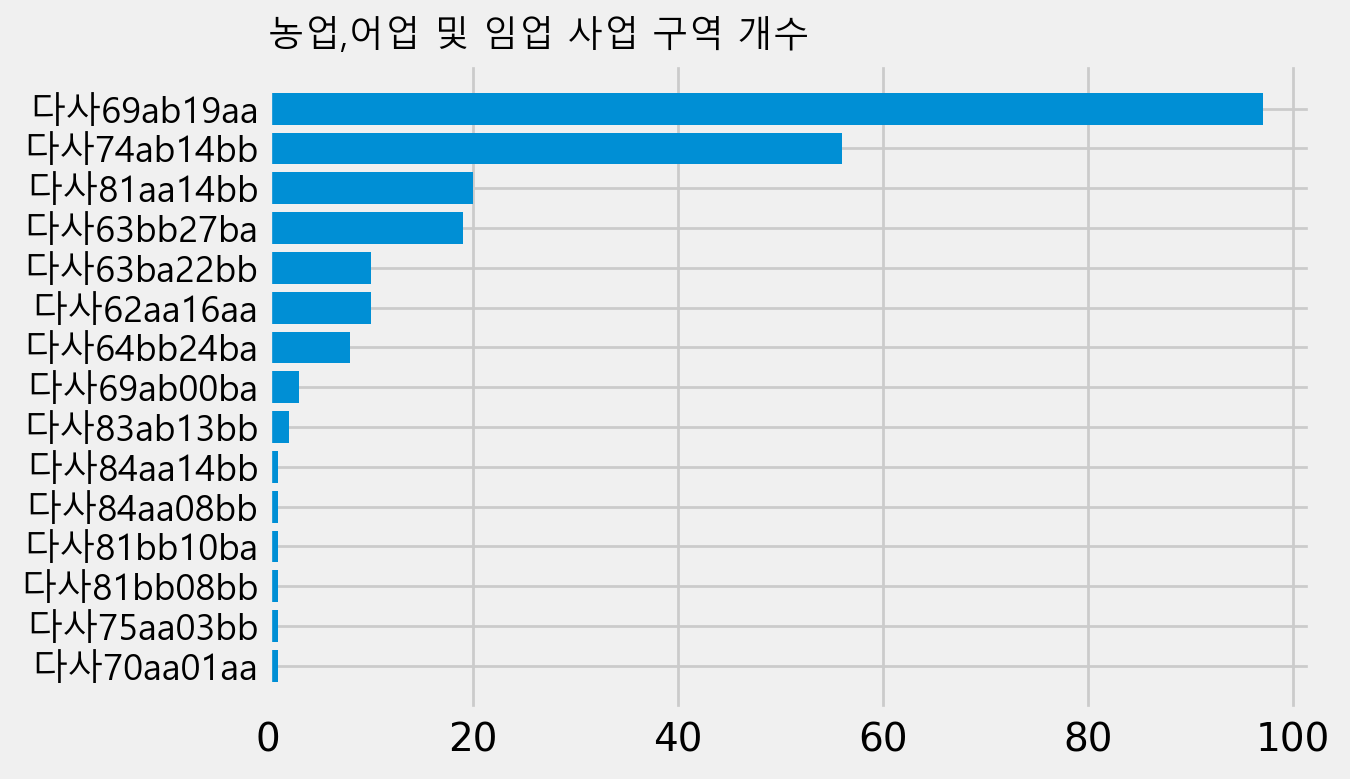

In [7]:
# 사업장 몇개인지.
idx=df_a.ws_cnt.sort_values().index

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
ax.barh(y=df_a.loc[idx,'gid'].values,width=df_a.loc[idx,'ws_cnt'].values)

ax.set_yticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop)
ax.set_title("농업,어업 및 임업 사업 구역 개수",fontproperties=fontprop,loc='left')
plt.show()

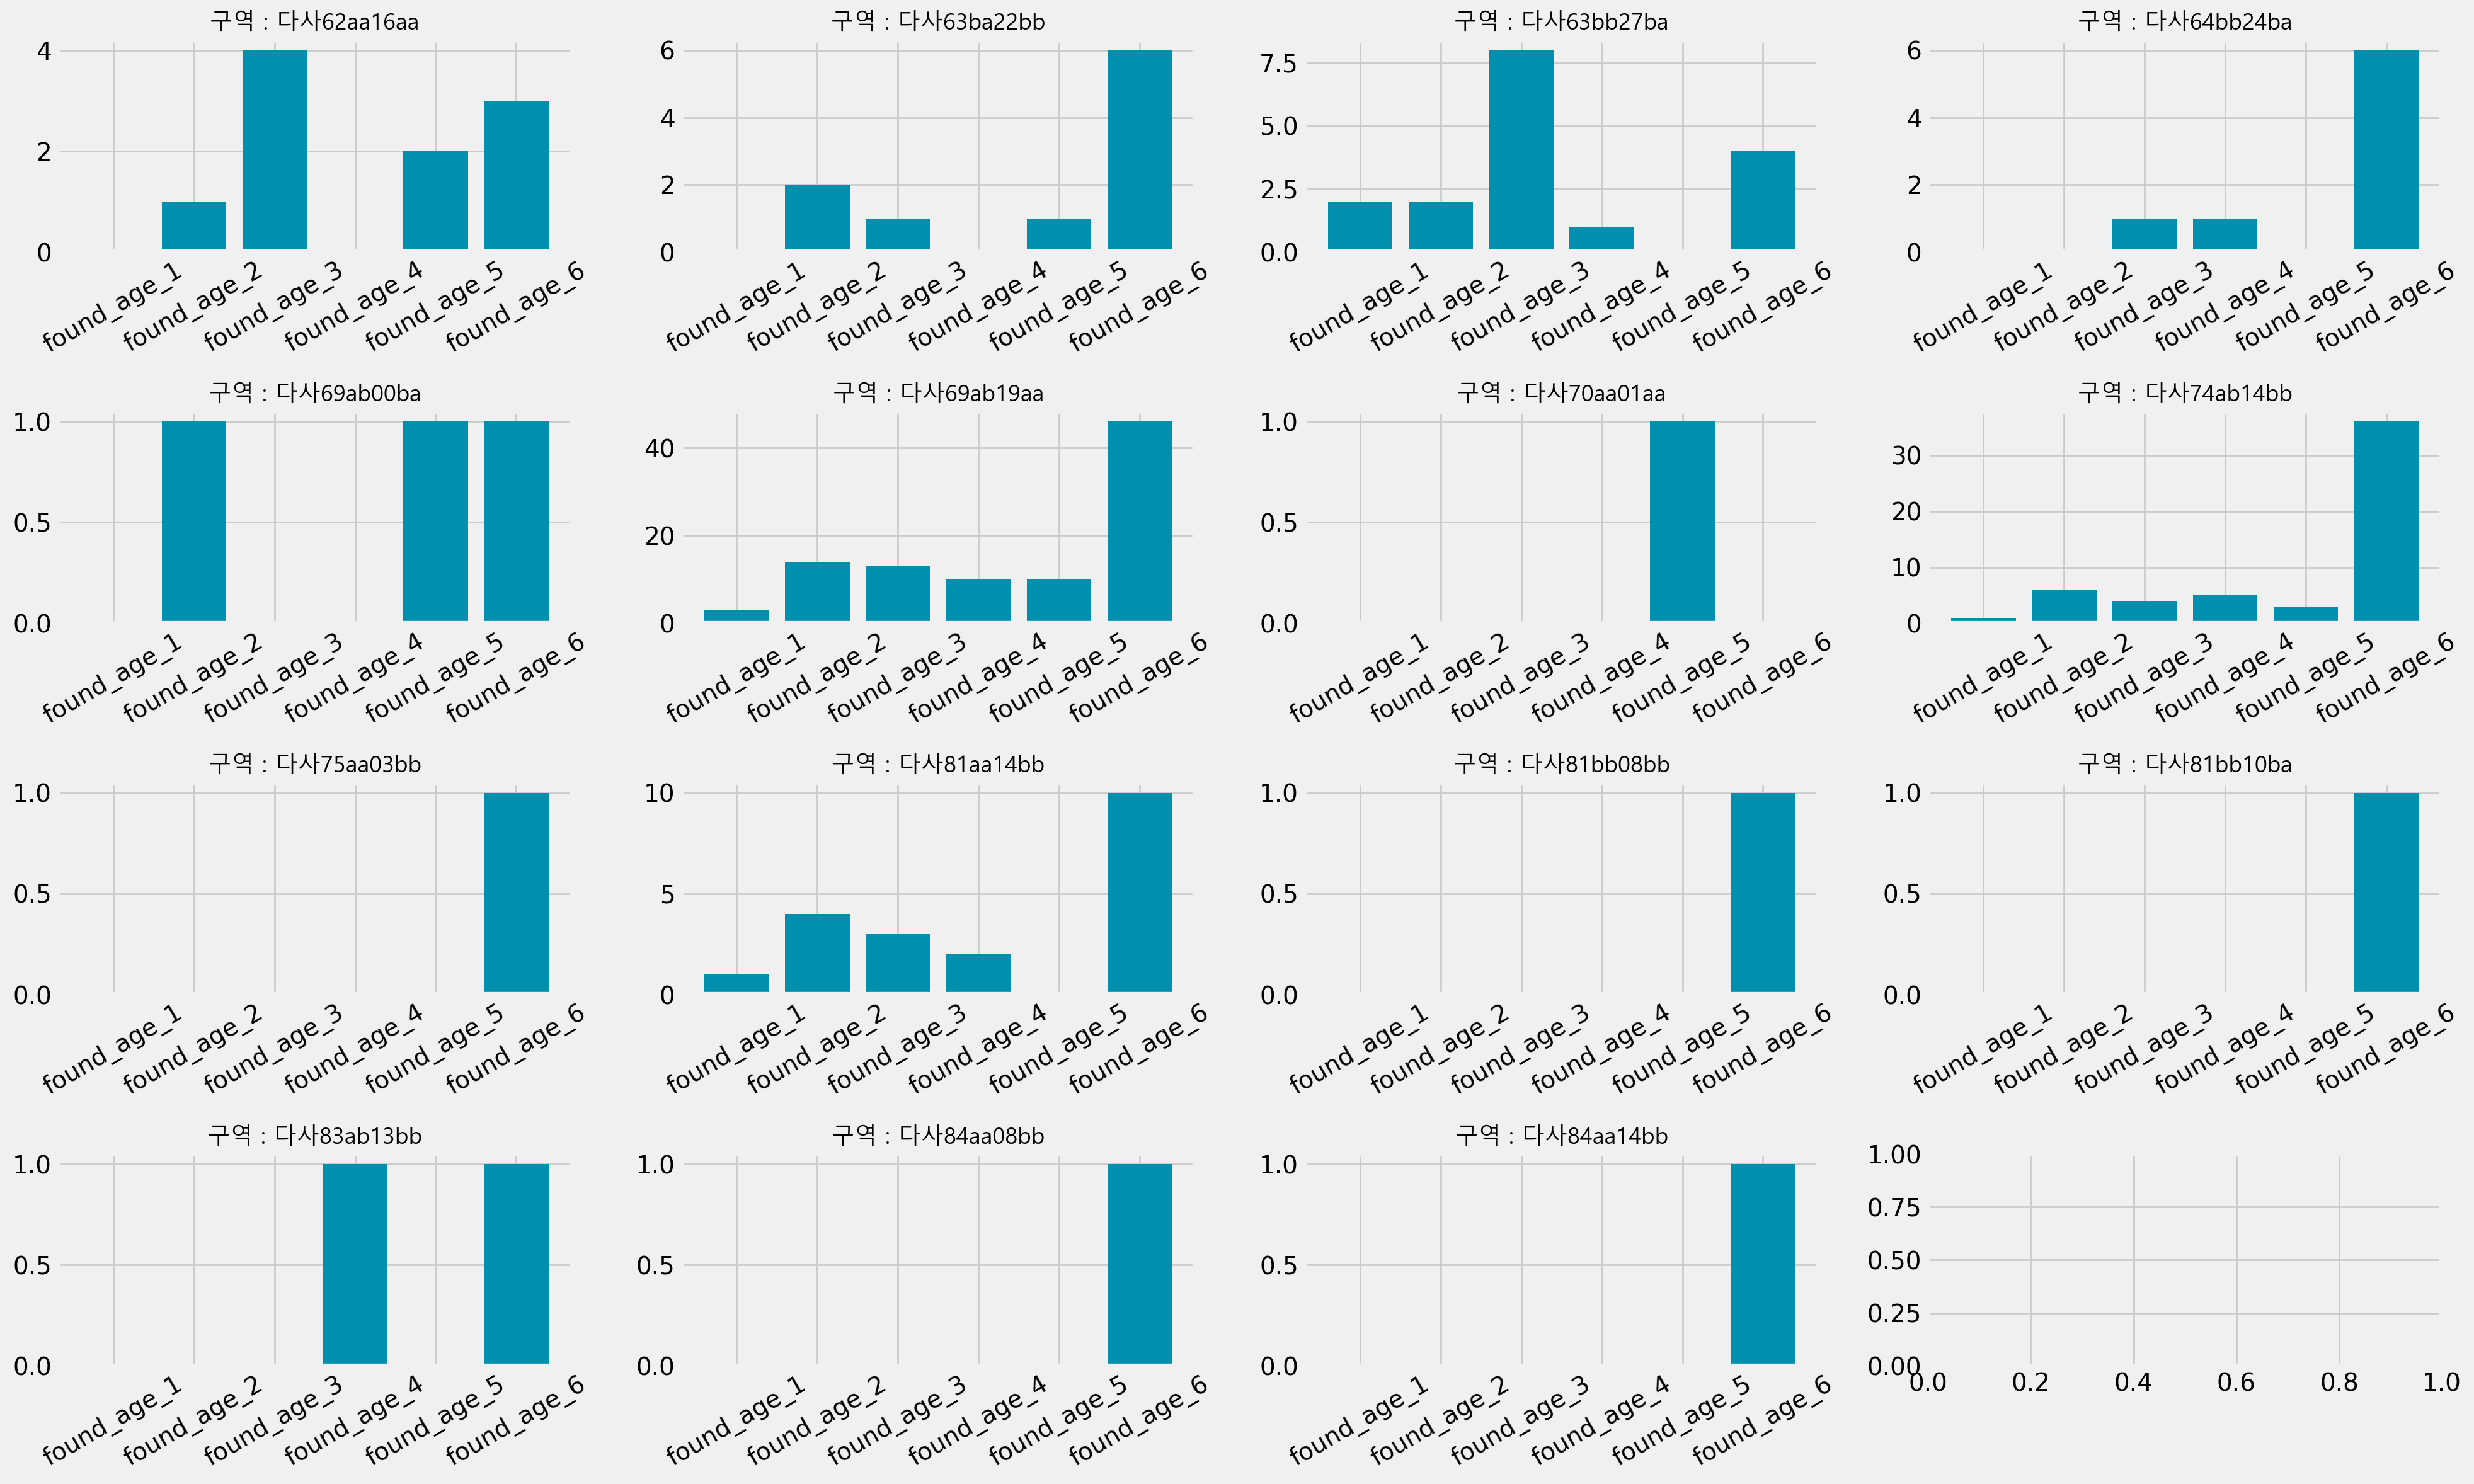

In [8]:
# 몇년 미만의 사업장 
cols=[col for col in df_a.columns if 'found' in col]
# 정리
df_a_sample=df_a.reset_index()
# grid plot
fig,axs=plt.subplots(4,4,figsize=(20,12),dpi=200)

for i in range(len(df_a_sample)):
    title=df_a_sample.loc[i,'gid']
    axs[i//4,i%4].bar(x=df_a_sample[cols].T.index,height=df_a_sample[cols].T[i].values,color='#008FAD')
    axs[i//4,i%4].set_title(f"구역 : {title}",fontproperties=fontprop)
    axs[i//4,i%4].set_xticklabels(labels=df_a_sample[cols].T.index,rotation=30)

plt.tight_layout()
plt.show()

In [9]:
# 어느 구역이 많이 휴페업점이 많은지.
df_a_sub=df_a.loc[df_a.runout_cnt>0,['gid','ws_cnt','runout_cnt']]
df_a_sub['사업장 대비 휴/폐점 비율']=df_a_sub['runout_cnt']/df_a_sub['ws_cnt']
df_a_sub

,gid,ws_cnt,runout_cnt,사업장 대비 휴/폐점 비율
342,다사63bb27ba,19,2,0.105263
991,다사69ab19aa,97,1,0.010309
1444,다사74ab14bb,56,1,0.017857


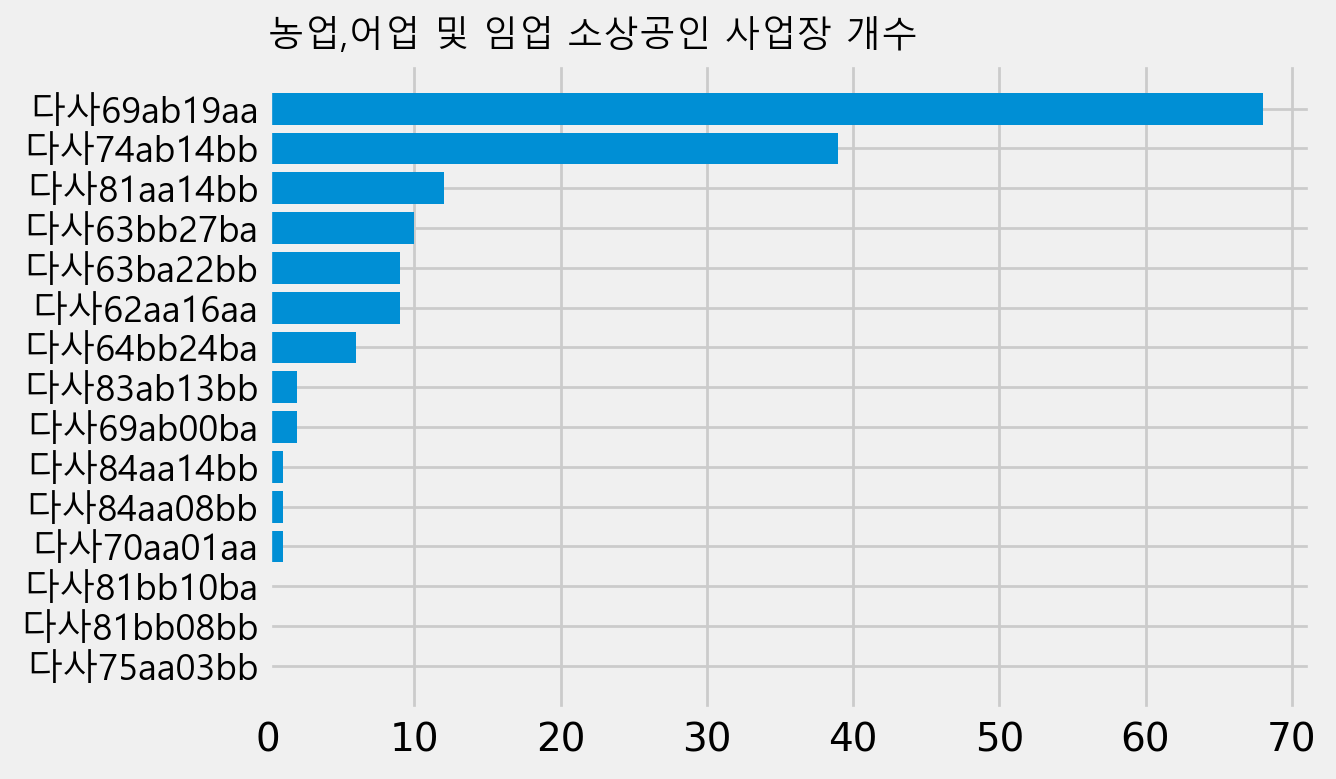

In [10]:
# 소상공인 사업장이 몇개인지.
idx=df_a.smbiz_yn_cnt.sort_values().index

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
ax.barh(y=df_a.loc[idx,'gid'].values,width=df_a.loc[idx,'smbiz_yn_cnt'].values)

ax.set_yticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop)
ax.set_title("농업,어업 및 임업 소상공인 사업장 개수",fontproperties=fontprop,loc='left')
plt.show()

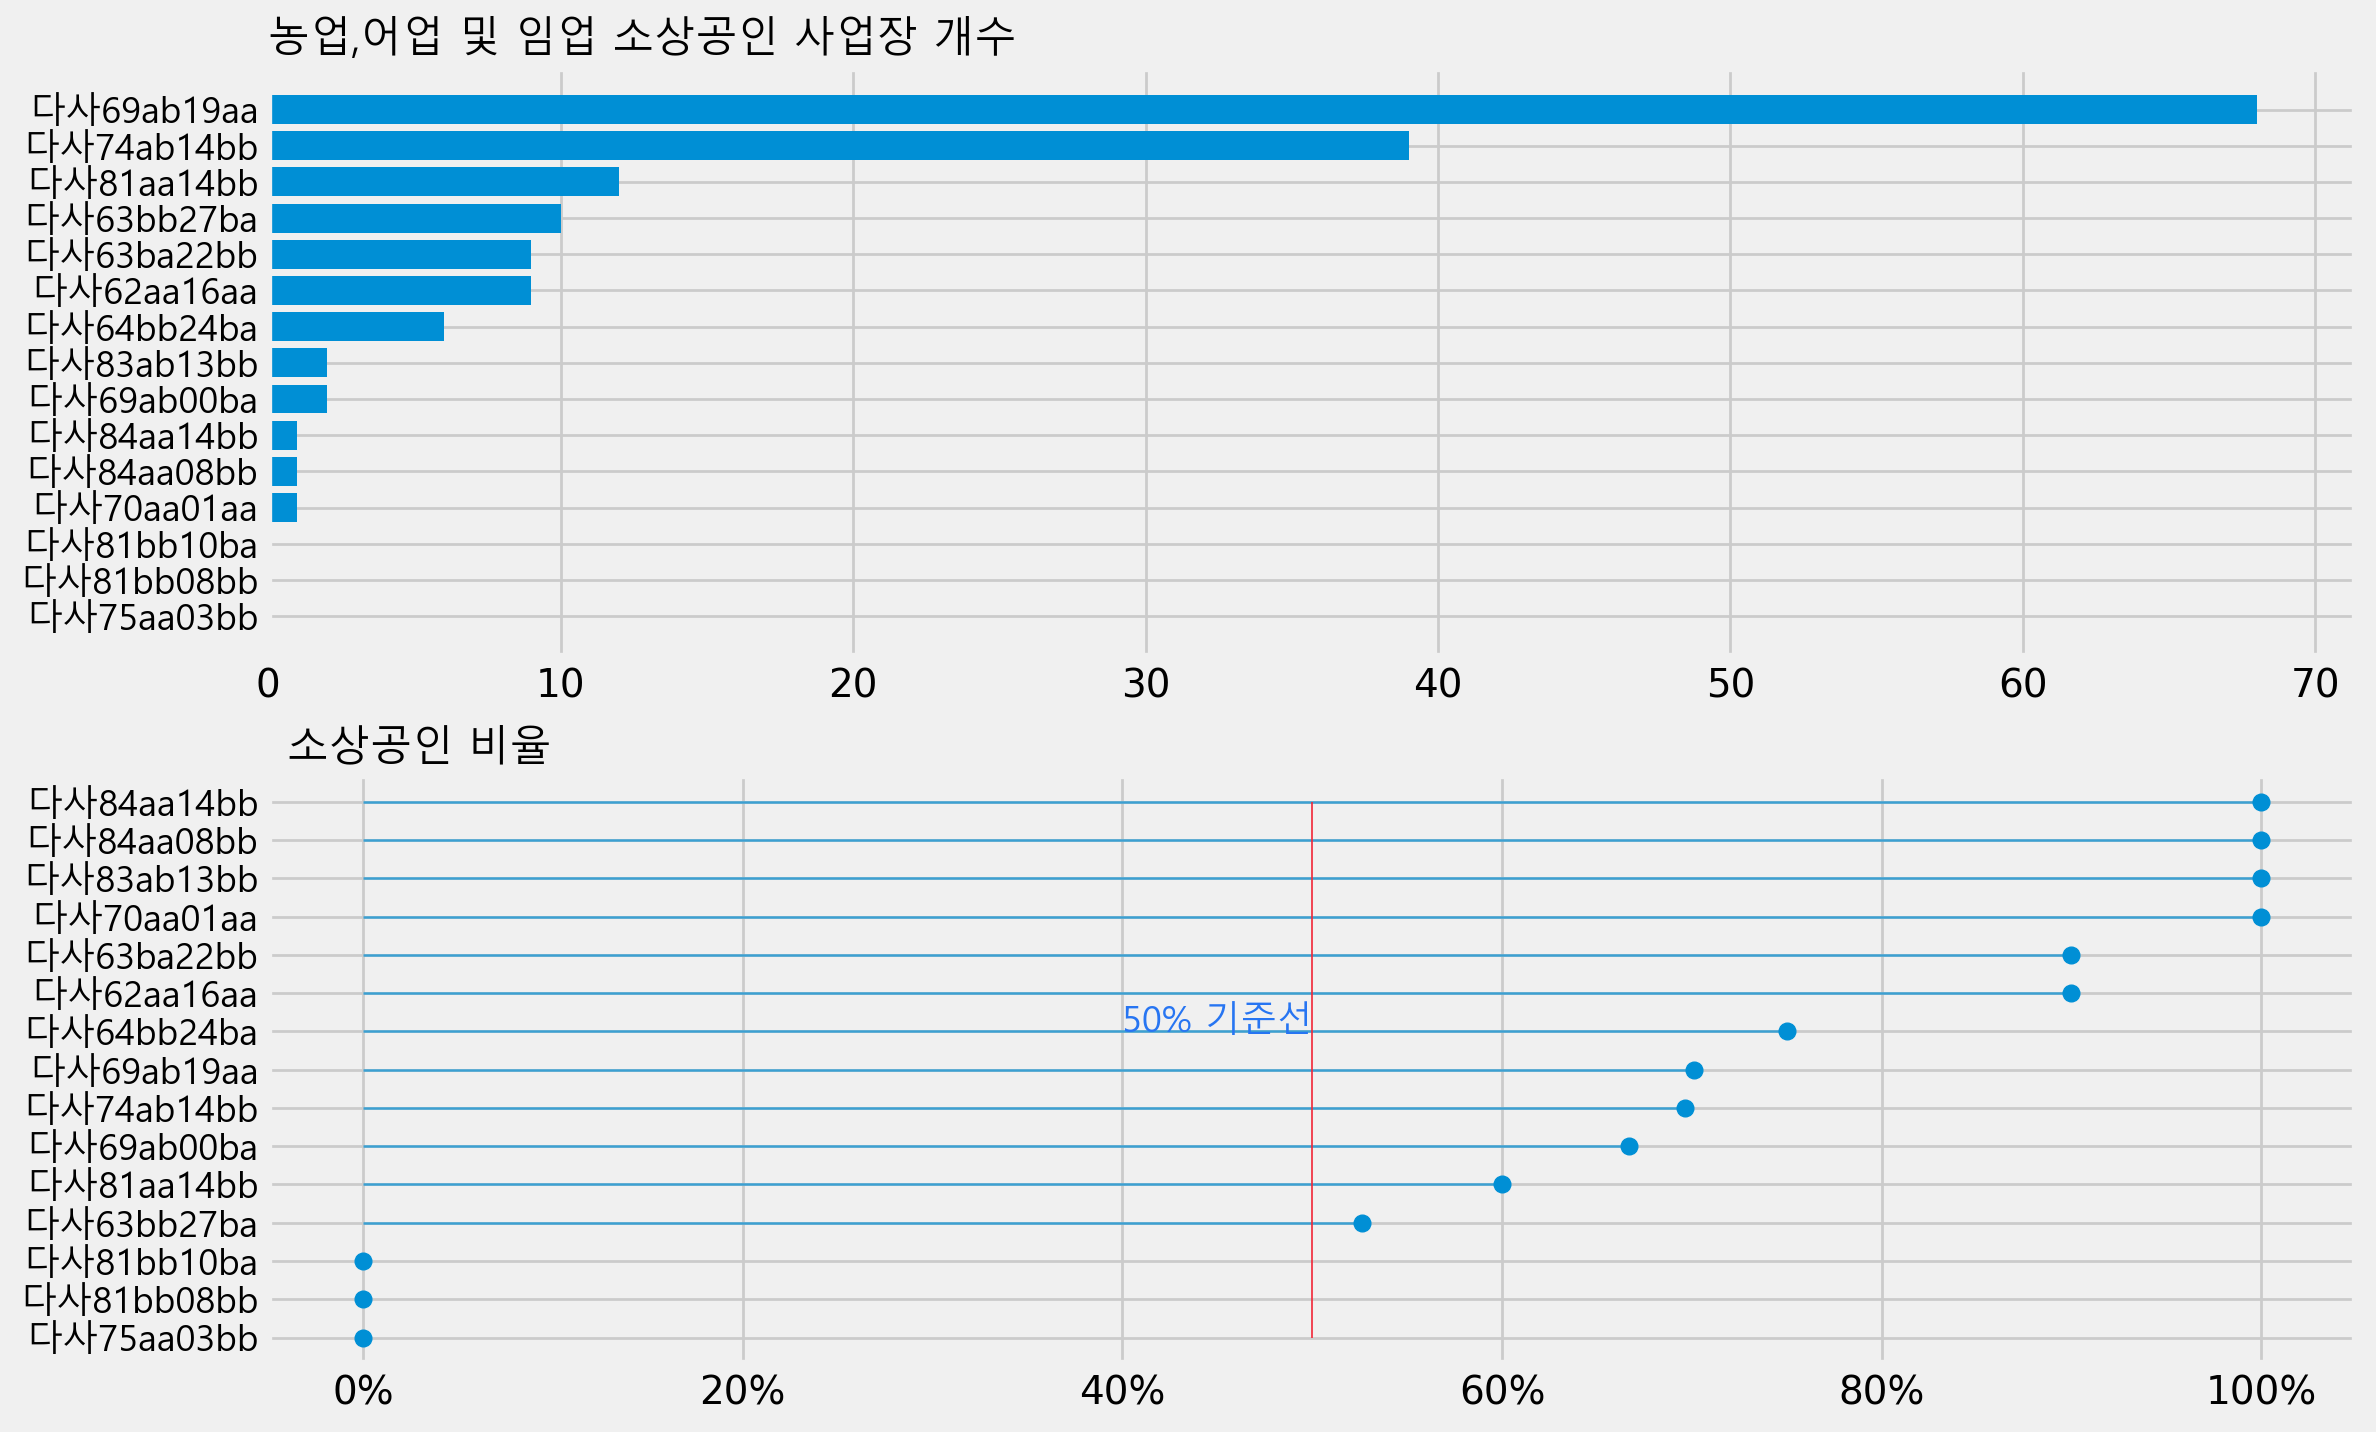

In [11]:
# 소상공인 사업장이 몇개인지.
df_a_sub=df_a[['smbiz_yn_cnt','ws_cnt']]
df_a_sub['소상공인 비율']=df_a_sub['smbiz_yn_cnt']/df_a_sub['ws_cnt']
df_a_sub=df_a_sub.sort_values(by='소상공인 비율')

idx=df_a.smbiz_yn_cnt.sort_values().index

fig,ax=plt.subplots(2,1,figsize=(12,8),dpi=200)
ax[0].barh(y=df_a.loc[idx,'gid'].values,width=df_a.loc[idx,'smbiz_yn_cnt'].values)

ax[0].set_yticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop)
ax[0].set_title("농업,어업 및 임업 소상공인 사업장 개수",fontproperties=fontprop,loc='left',fontsize=15)

ax[1].hlines(y=range(15),xmin=0,xmax=df_a_sub['소상공인 비율']*100,alpha=0.7,lw=0.9)
ax[1].scatter(x=df_a_sub['소상공인 비율']*100,y=range(15))
ax[1].set_yticks(range(15))
ax[1].set_yticklabels(df_a.loc[df_a_sub.index,'gid'].values,fontproperties=fontprop)
ax[1].vlines(x=50,ymin=0,ymax=14,lw=0.6,color='#f22738')
ax[1].annotate(text="50% 기준선",xy=(40,8),fontproperties=fontprop,color='#2775f2')
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].text(s="소상공인 비율",x=-4,y=15.1,fontproperties=fontprop,fontsize=15)
plt.show()

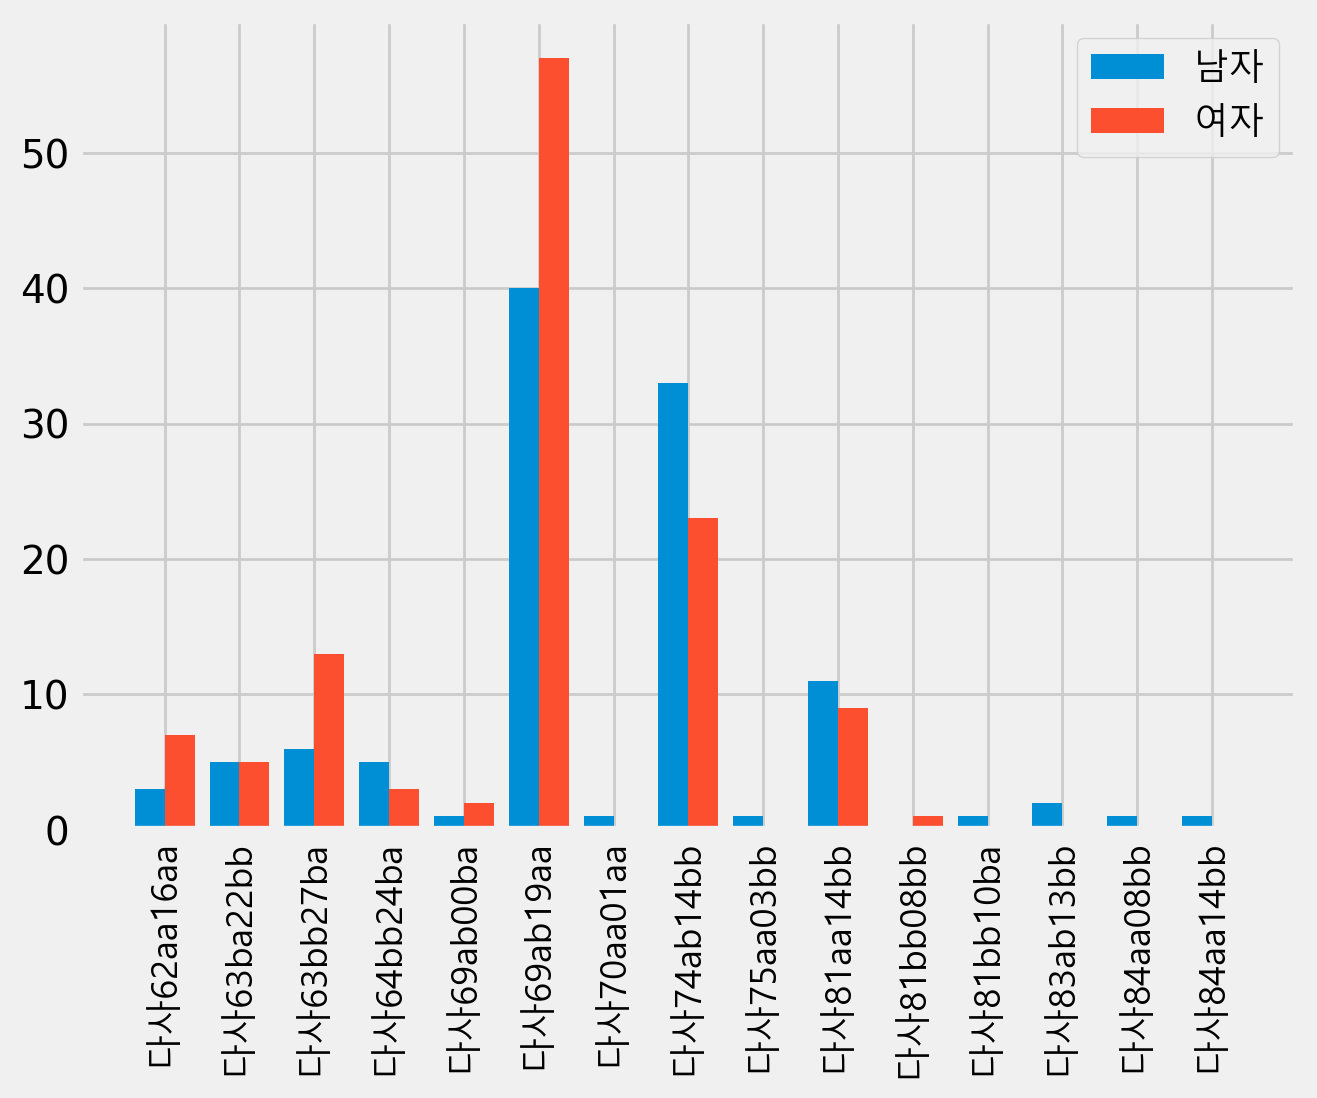

In [12]:
# 대표자님의 성별
cols=[col for col in df_a.columns if 'rpr_per_gender' in col]
idx=df_a[cols].index

r1=np.arange(len(idx))
r2=[x - 0.2 for x in r1]
r3=[x + 0.2 for x in r1]


fig,ax=plt.subplots(1,1,figsize=(7,5),dpi=200)

ax.bar(x=r2,height=df_a[cols].rpr_per_gender_m,width=0.4,label='남자')
ax.bar(x=r3,height=df_a[cols].rpr_per_gender_f,width=0.4,label='여자')

ax.set_xticks(r1)
ax.set_xticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop,rotation=90)
ax.legend(prop=fontprop)
plt.show()

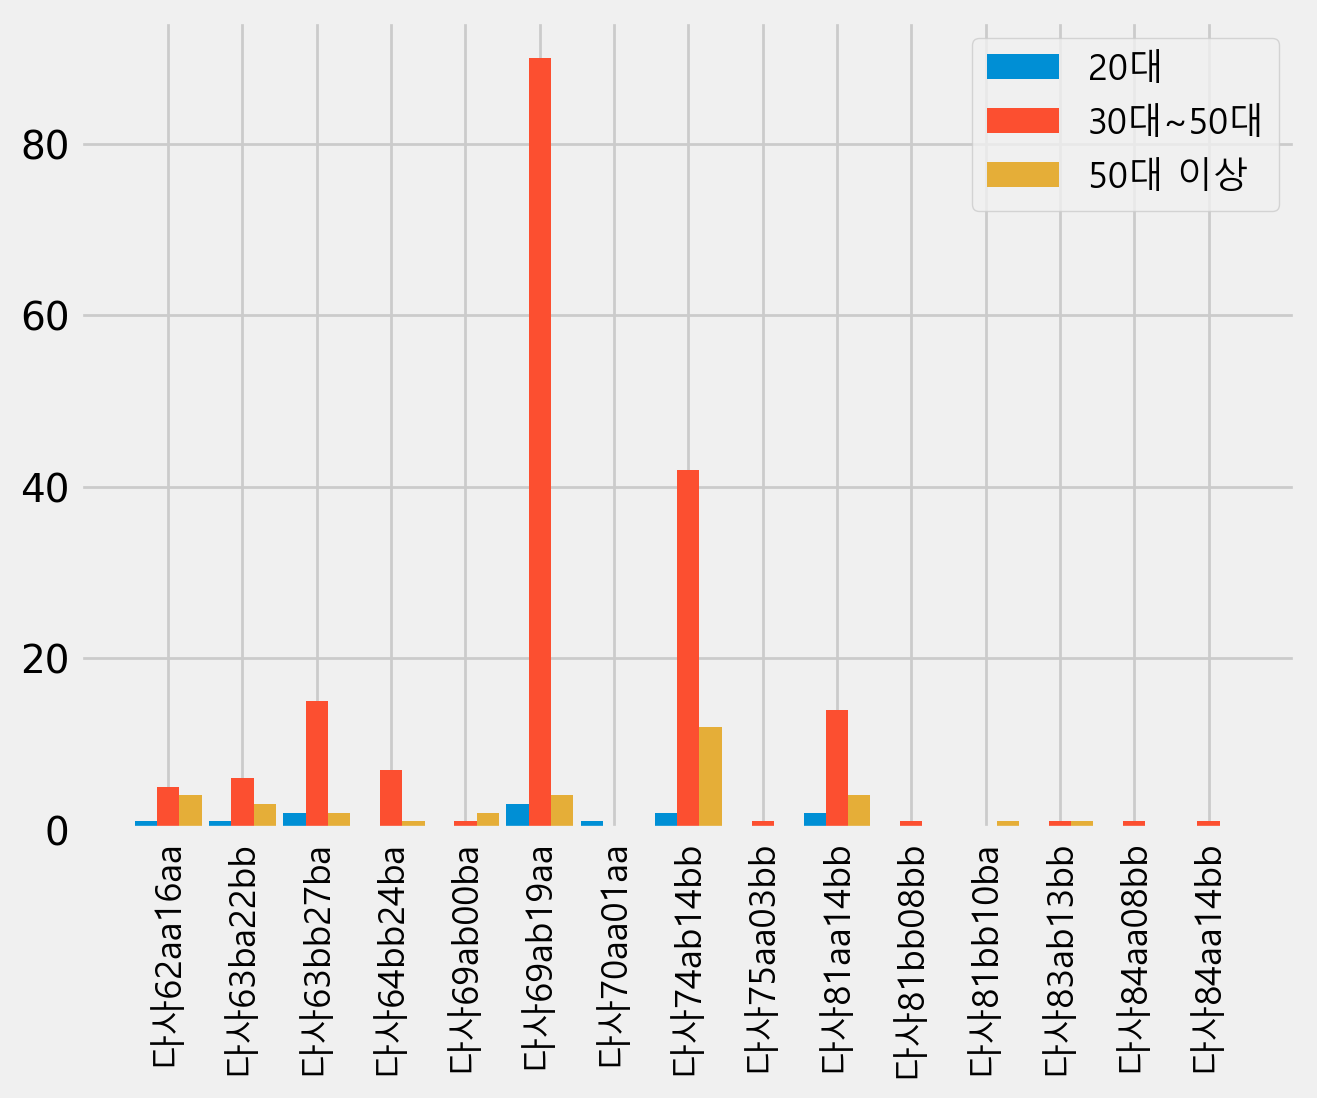

In [13]:
# 대표자님의 나이대
cols=[col for col in df_a.columns if 'rpr_per_age' in col]
idx=df_a[cols].index

r=np.arange(len(idx))
r1=[x - 0.3 for x in r]
r2=[x + 0.3 for x in r]

fig,ax=plt.subplots(1,1,figsize=(7,5),dpi=200)

ax.bar(x=r1,height=df_a[cols].rpr_per_age_bin_20,width=0.3,label='20대')
ax.bar(x=r,height=df_a[cols].rpr_per_age_bin_30to50,width=0.3,label='30대~50대')
ax.bar(x=r2,height=df_a[cols].rpr_per_age_bin_50over,width=0.3,label='50대 이상')

ax.set_xticks(r)
ax.set_xticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop,rotation=90)
ax.legend(prop=fontprop)
plt.show()

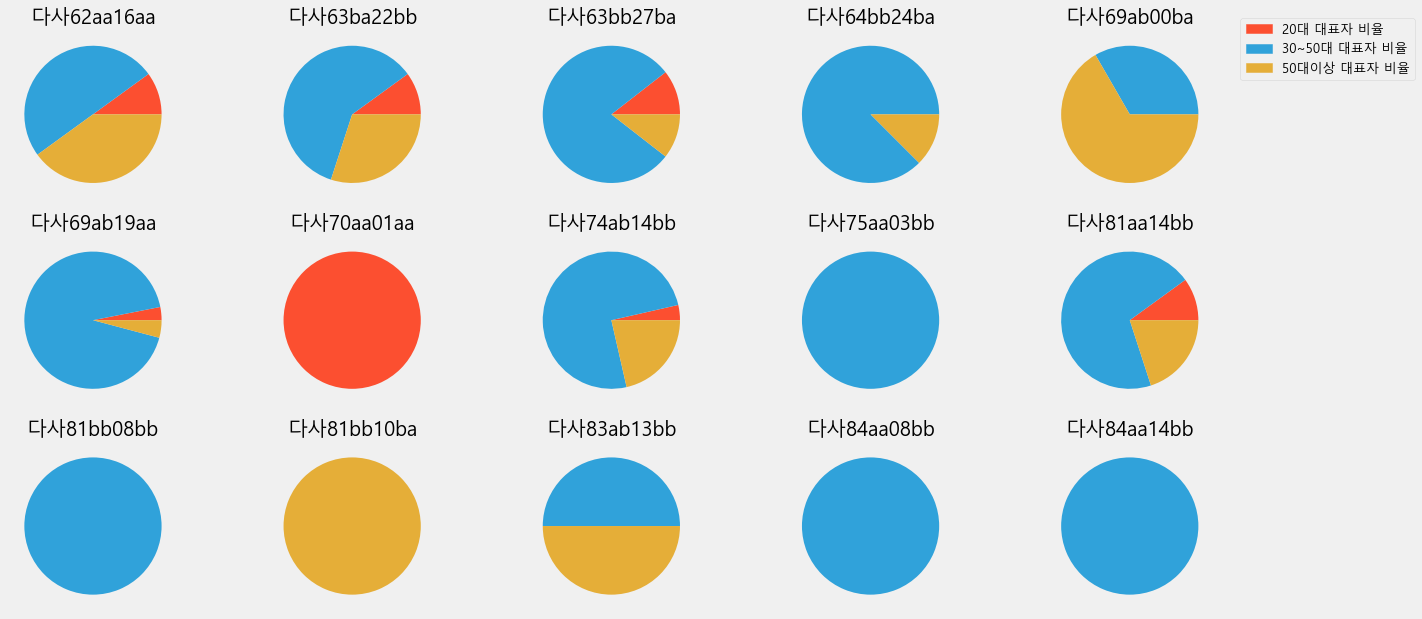

In [14]:
df_a_sub=df_a[cols]
df_a_sub['총합']=df_a_sub.apply(lambda row:row.rpr_per_age_bin_10+row.rpr_per_age_bin_20+row.rpr_per_age_bin_30to50+row.rpr_per_age_bin_50over,axis=1)
df_a_sub['20대 대표자 비율']=df_a_sub['rpr_per_age_bin_20']/df_a_sub['총합']
df_a_sub['30~50대 대표자 비율']=df_a_sub['rpr_per_age_bin_30to50']/df_a_sub['총합']
df_a_sub['50대이상 대표자 비율']=df_a_sub['rpr_per_age_bin_50over']/df_a_sub['총합']
df_a_sub=df_a_sub[['20대 대표자 비율','30~50대 대표자 비율','50대이상 대표자 비율']]

fig,ax=plt.subplots(3,5,figsize=(20,10))

for idx,index in enumerate(df_a_sub.index):
    ax[idx//5][idx%5].pie(df_a_sub.loc[index].values*100,colors=['#fc4f30','#30a2da','#e5ae38'])
    ax[idx//5][idx%5].set_title(f"{df_a.loc[index,'gid']}",fontproperties=fontprop,fontsize=20)

red_patch = mpatches.Patch(color='#fc4f30', label='20대 대표자 비율')
blue_patch = mpatches.Patch(color='#30a2da', label='30~50대 대표자 비율')
yellow_patch = mpatches.Patch(color='#e5ae38', label='50대이상 대표자 비율')
                                
plt.legend(handles=[red_patch,blue_patch,yellow_patch],prop=fontprop,
           bbox_to_anchor=(2.2,3.5),fontsize=15,frameon=True)                                
plt.tight_layout()
plt.show()

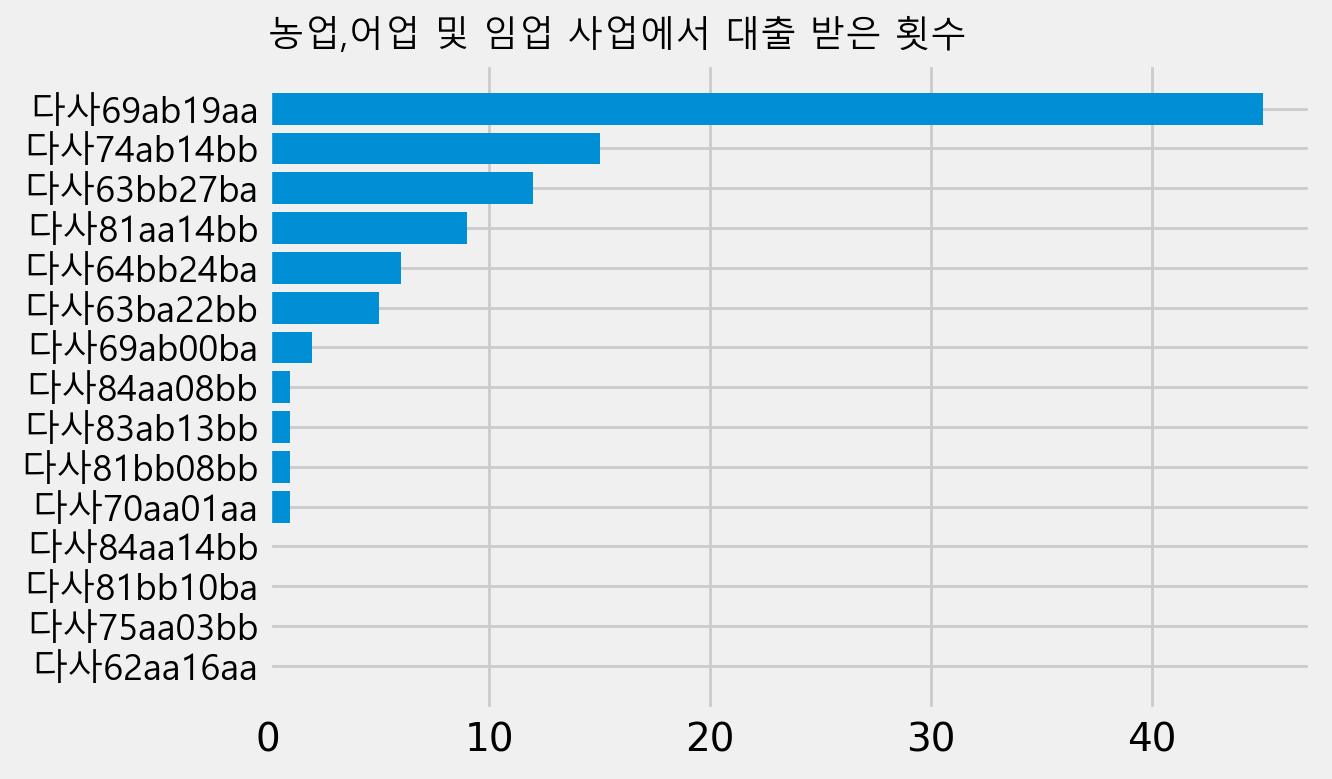

In [15]:
# 대출받은 횟수
idx=df_a.sme_loan_cnt.sort_values().index

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
ax.barh(y=df_a.loc[idx,'gid'].values,width=df_a.loc[idx,'sme_loan_cnt'].values)

ax.set_yticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop)
ax.set_title("농업,어업 및 임업 사업에서 대출 받은 횟수",fontproperties=fontprop,loc='left')
plt.show()

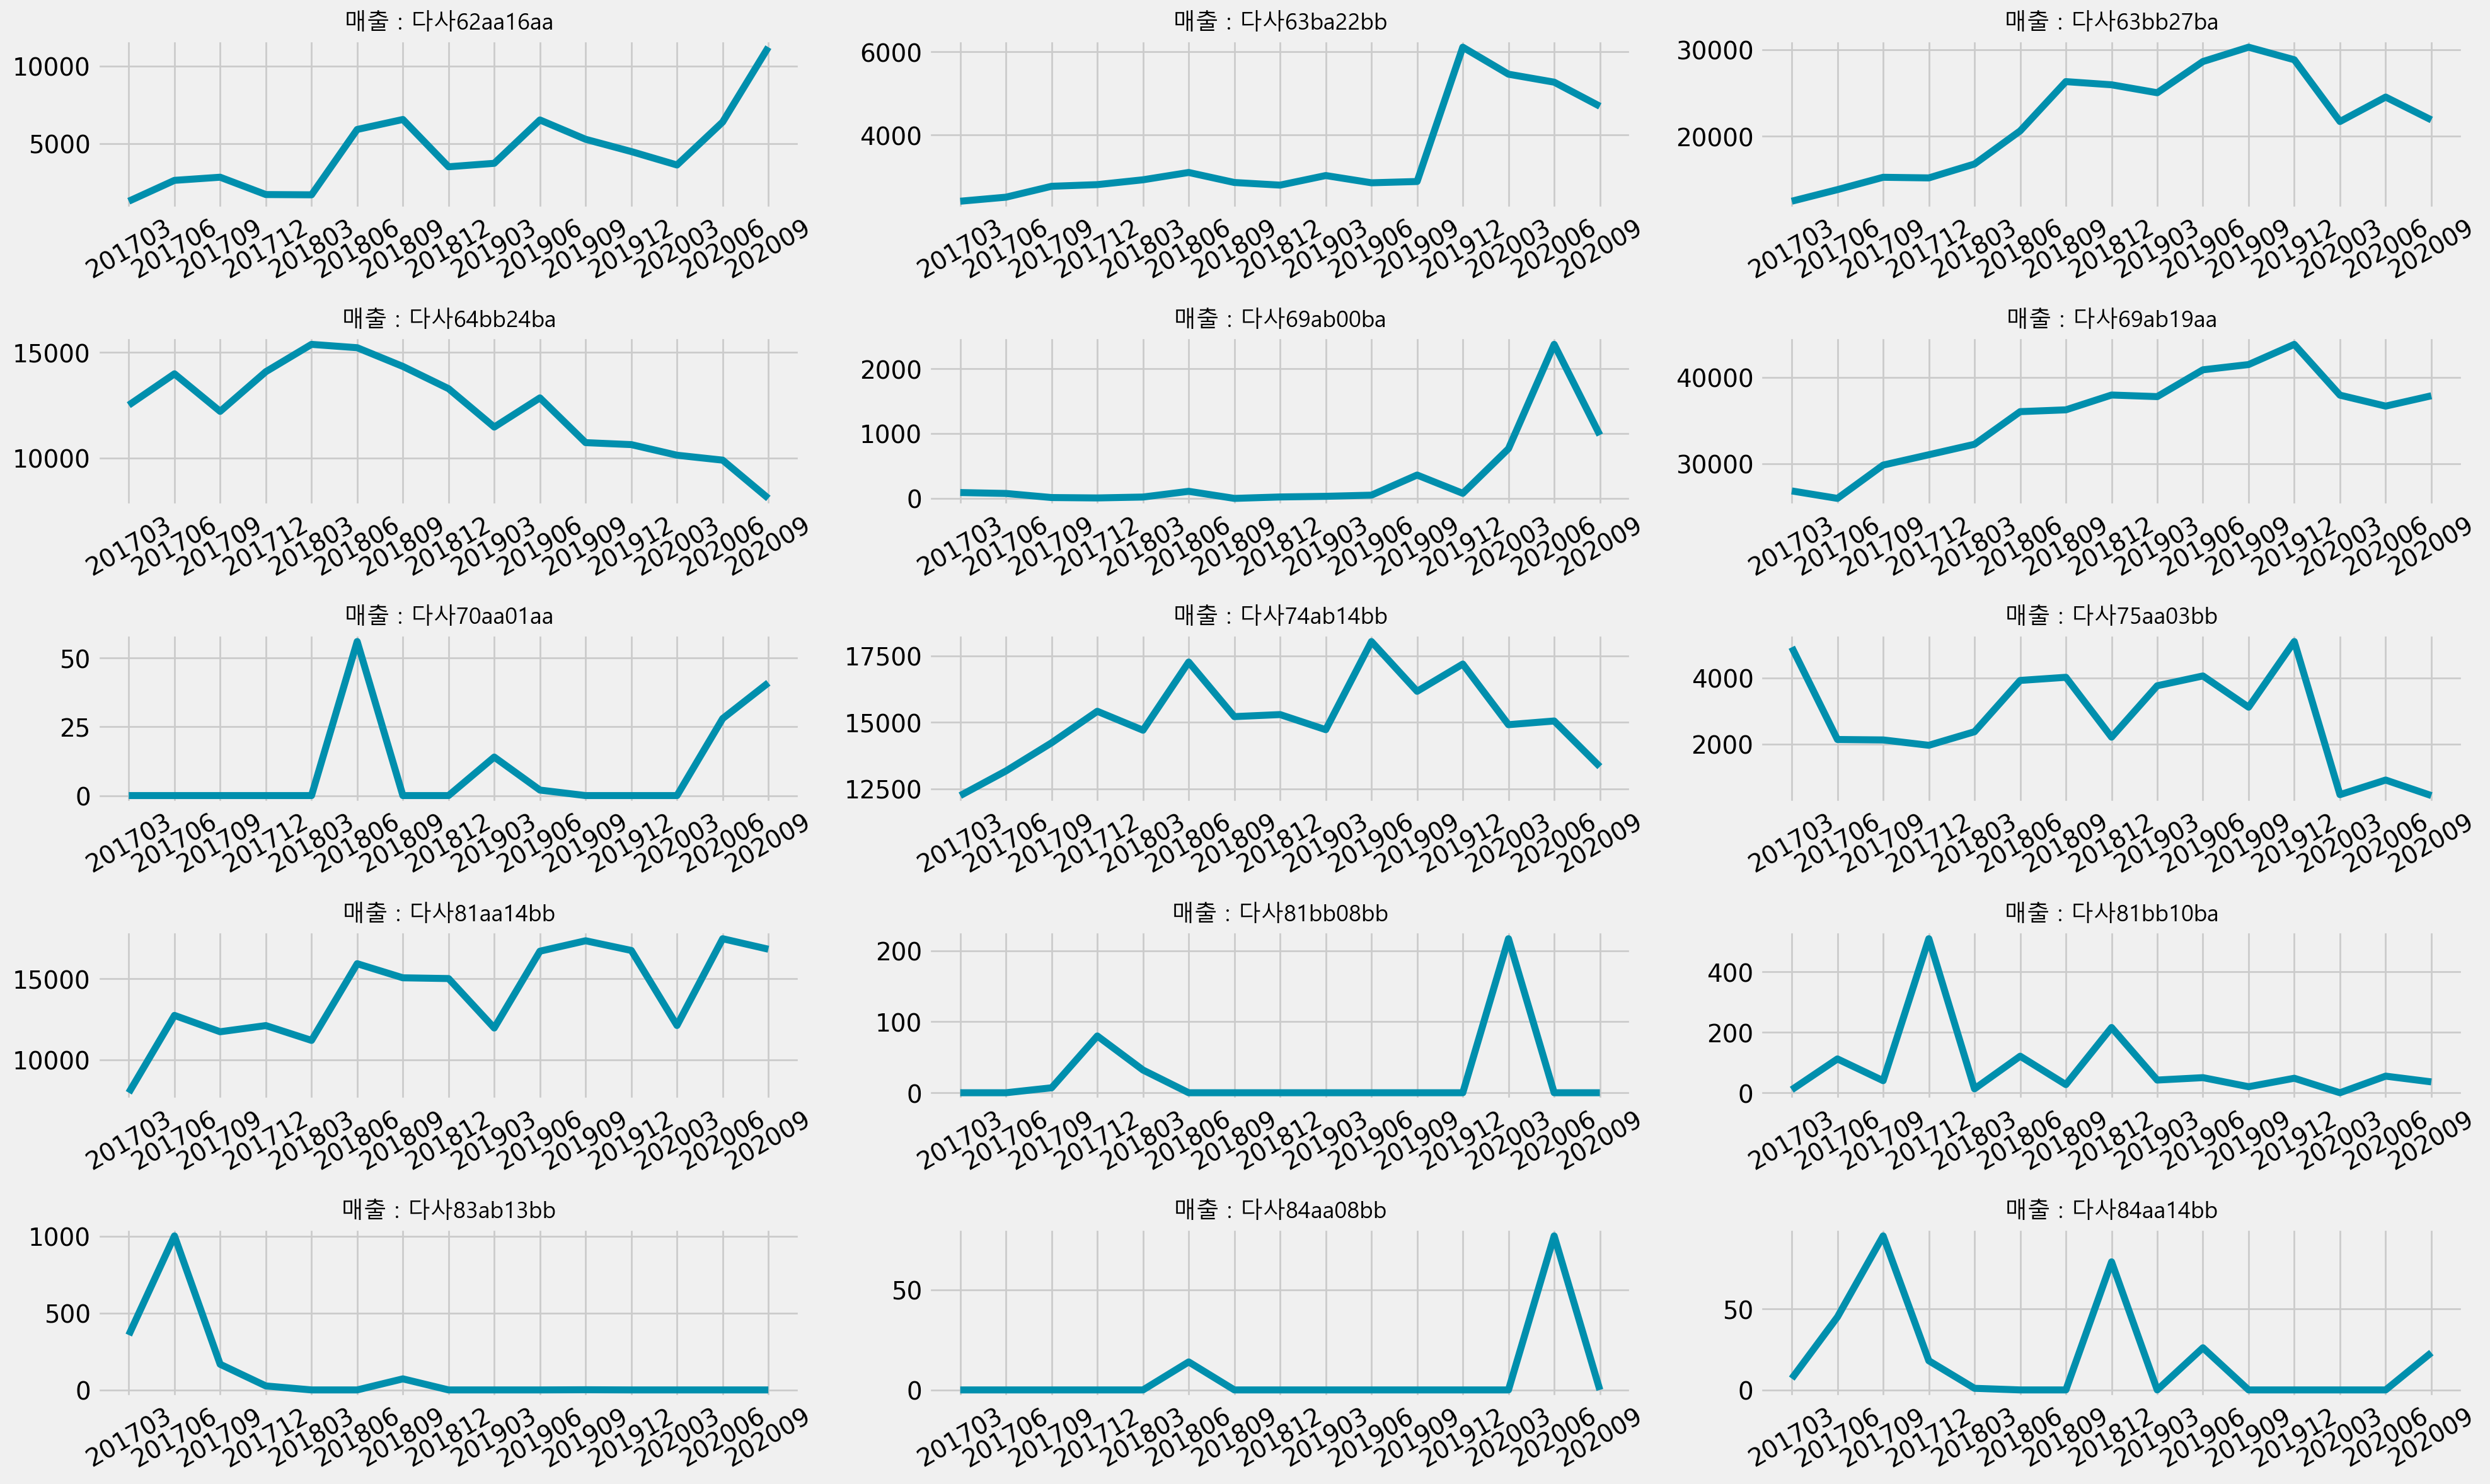

In [16]:
# 매출
cols=[col for col in df_a.columns if 'sales' in col]
df_a_sample=df_a.reset_index()
names=[idx[-6:] for idx in df_a_sample[cols].T.index]
# grid plot
fig,axs=plt.subplots(5,3,figsize=(20,12),dpi=200)

for i in range(len(df_a_sample)):
    title=df_a_sample.loc[i,'gid']
    axs[i//3,i%3].plot(df_a_sample[cols].T.index,df_a_sample[cols].T[i].values,color='#008FAD')
    axs[i//3,i%3].set_title(f"매출 : {title}",fontproperties=fontprop)
    axs[i//3,i%3].set_xticklabels(labels=names,rotation=30)

plt.tight_layout()
plt.show()

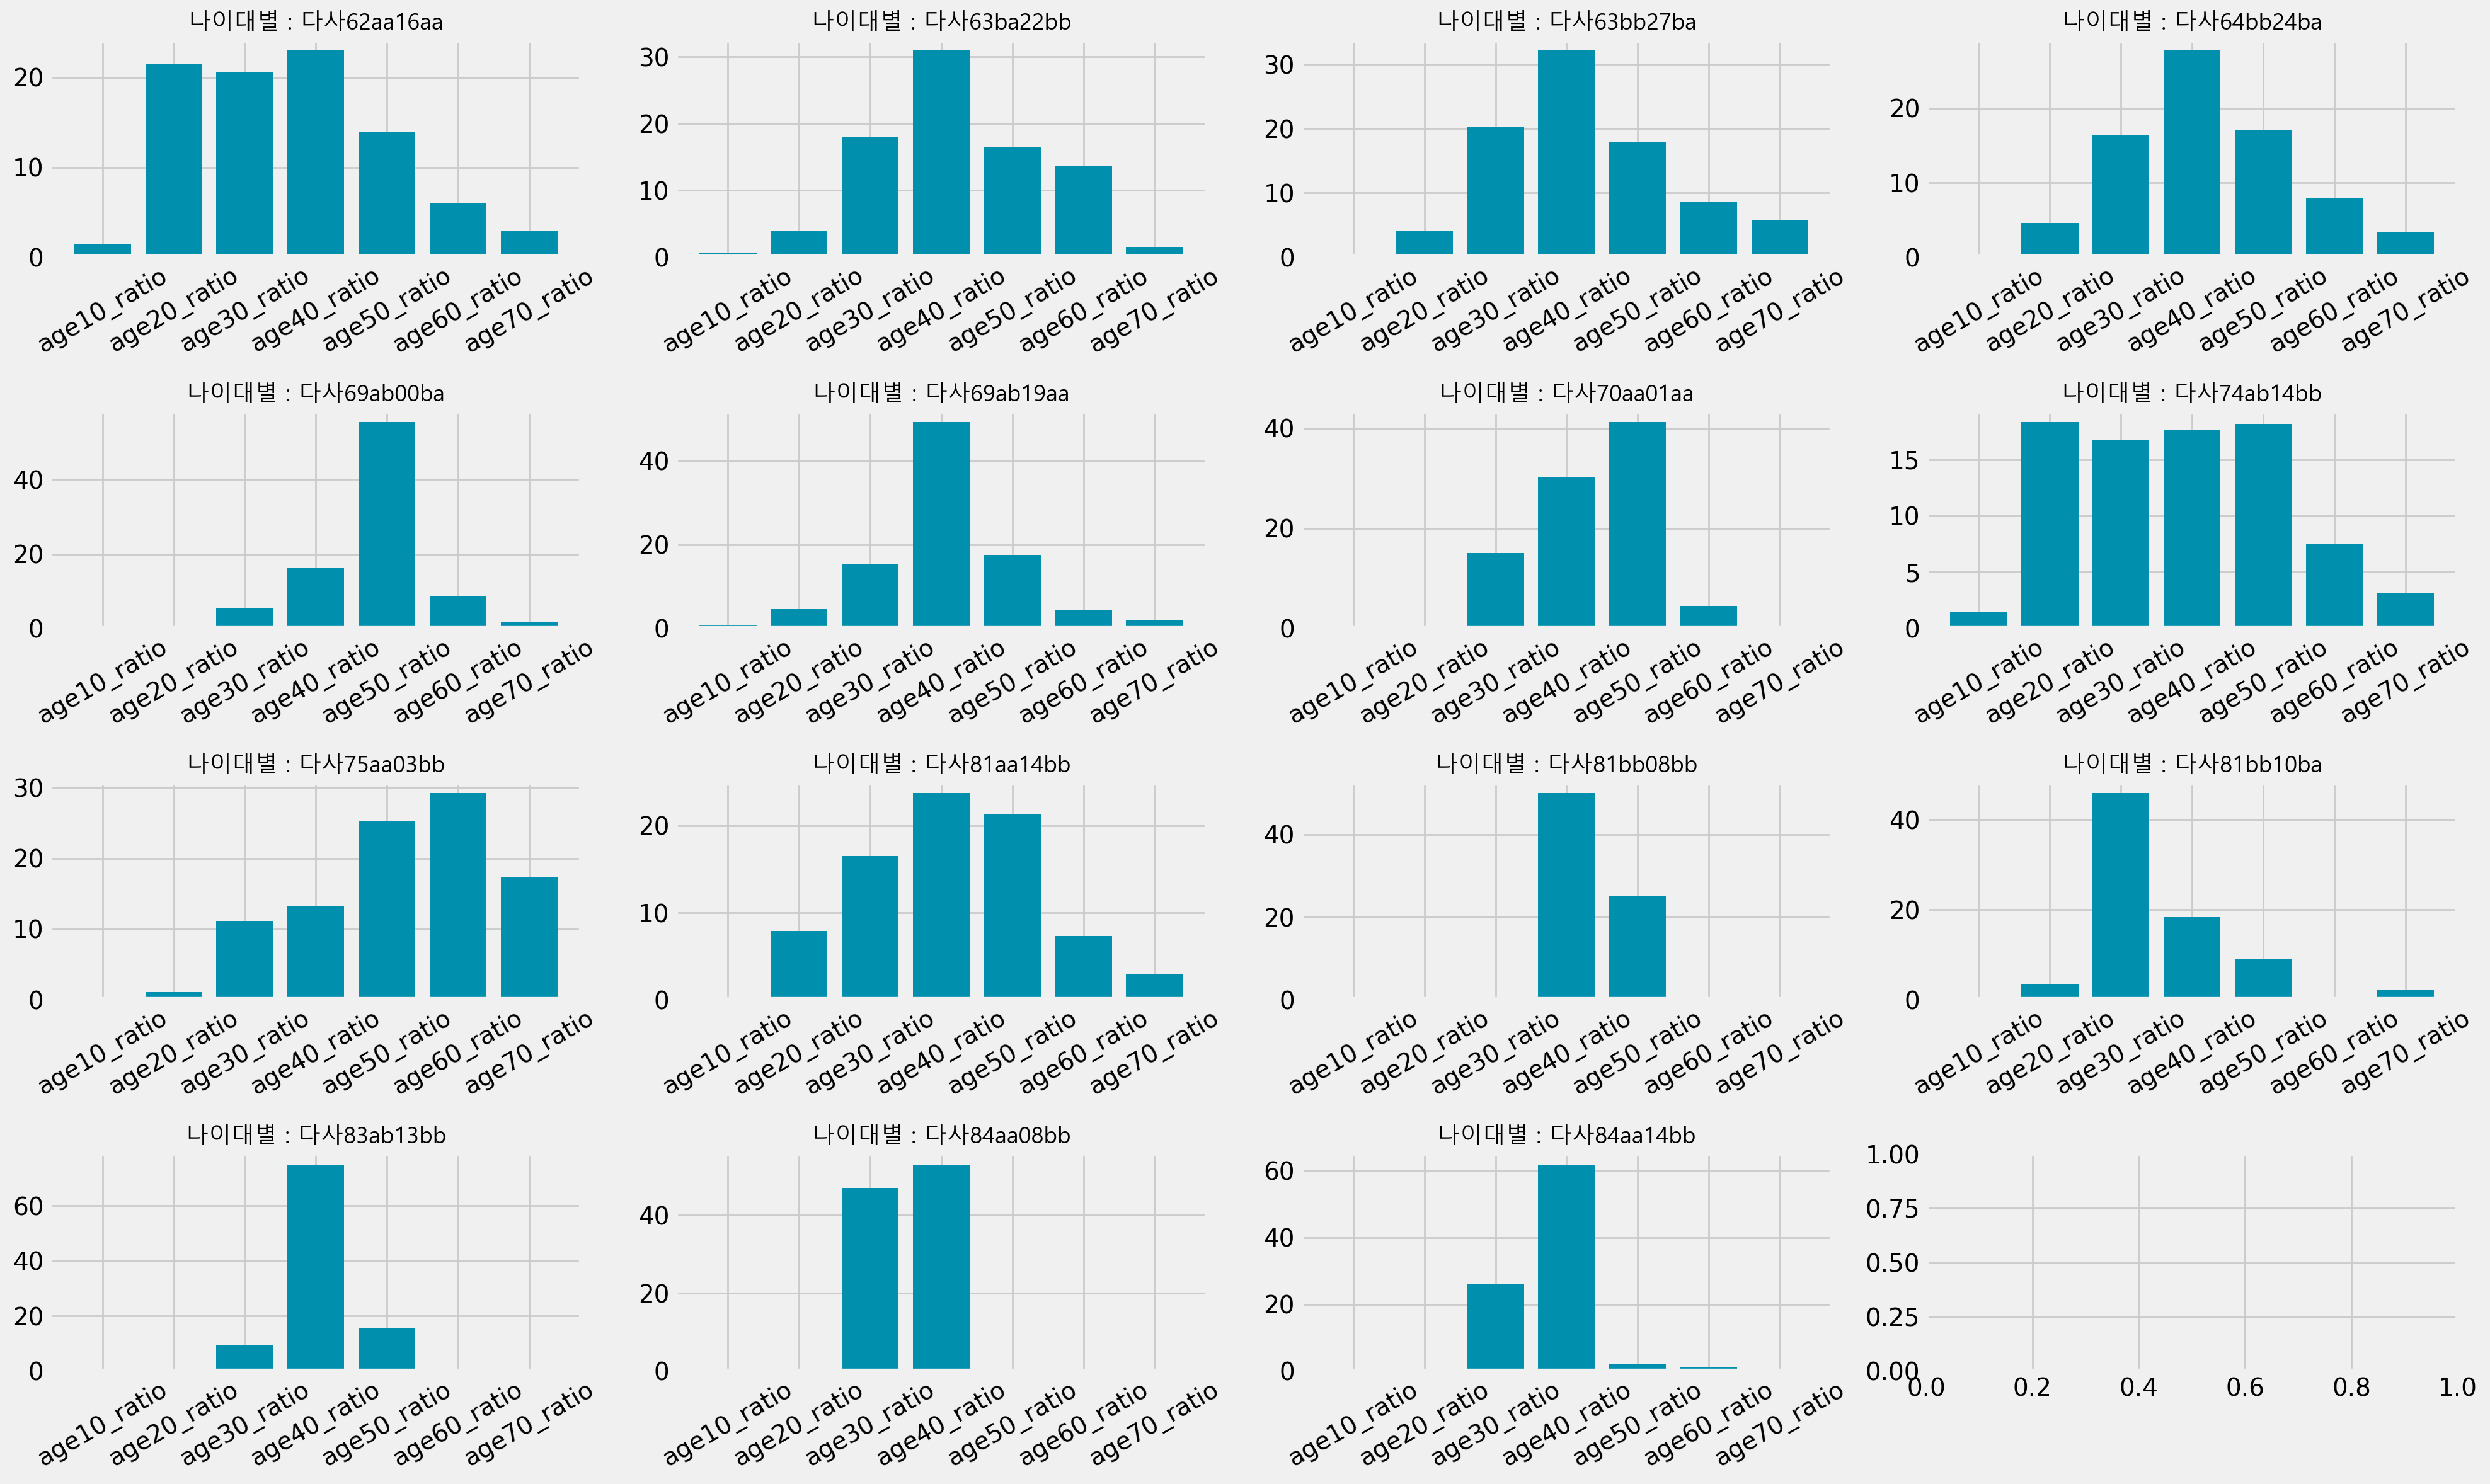

In [17]:
# 이용자 나이대 별
cols=[col for col in df_a.columns if 'ratio' in col]
df_a_sample=df_a.reset_index()
# grid plot
fig,axs=plt.subplots(4,4,figsize=(20,12),dpi=200)

for i in range(len(df_a_sample)):
    title=df_a_sample.loc[i,'gid']
    axs[i//4,i%4].bar(x=df_a_sample[cols].T.index,height=df_a_sample[cols].T[i].values,color='#008FAD')
    axs[i//4,i%4].set_title(f"나이대별 : {title}",fontproperties=fontprop)
    axs[i//4,i%4].set_xticklabels(labels=df_a_sample[cols].T.index,rotation=30)

plt.tight_layout()
plt.show()

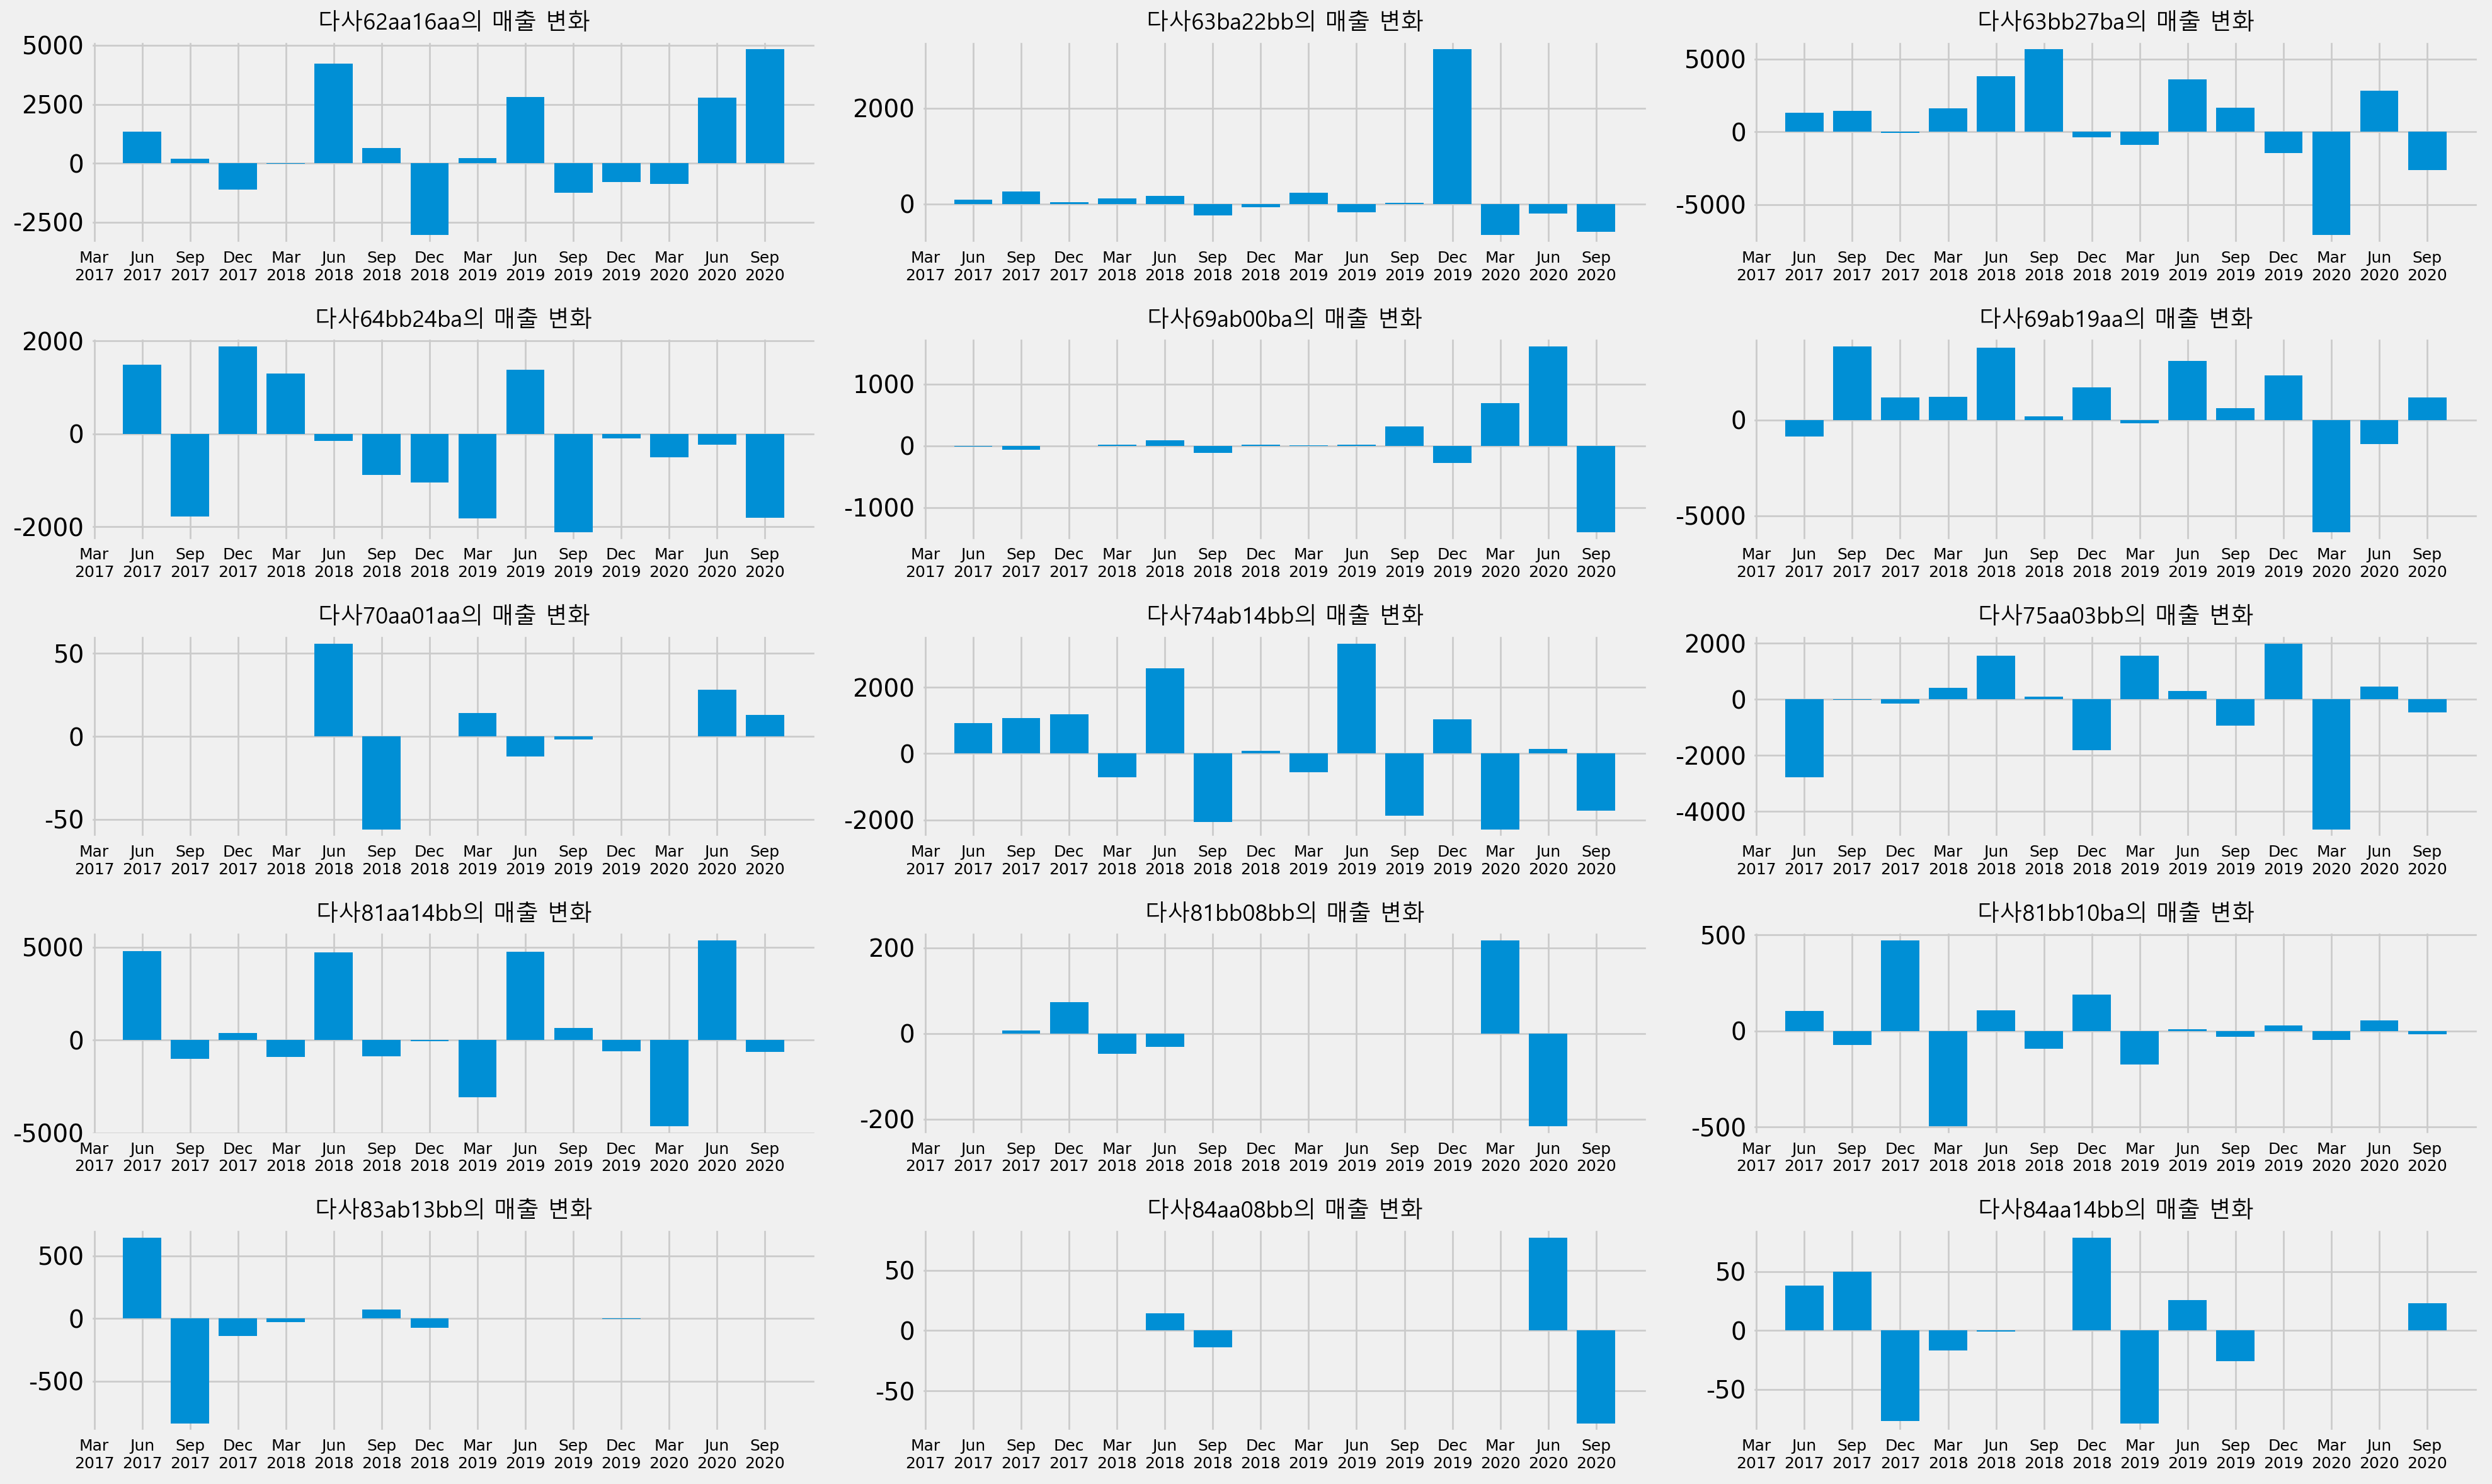

In [18]:
cols=[col for col in df_a.columns if 'sales' in col]

fig,ax=plt.subplots(5,3,figsize=(20,12),dpi=200)

for n,idx in enumerate(df_a.index):

# labels=[datetime(2017,3,1),datetime(2017,6,1),datetime(2017,9,1),datetime(2017,12,1),
#         datetime(2018,3,1),datetime(2018,6,1),datetime(2018,9,1),datetime(2018,12,1),
#         datetime(2019,3,1),datetime(2019,6,1),datetime(2019,9,1),datetime(2019,12,1),
#         datetime(2020,3,1),datetime(2020,6,1),datetime(2020,9,1)]

    labels=['Mar\n2017','Jun\n2017','Sep\n2017','Dec\n2017',
            'Mar\n2018','Jun\n2018','Sep\n2018','Dec\n2018',
            'Mar\n2019','Jun\n2019','Sep\n2019','Dec\n2019',
            'Mar\n2020','Jun\n2020','Sep\n2020']

    ax[n//3,n%3].bar(x=range(15),height=df_a[cols].loc[idx].diff(periods=1))

    ax[n//3,n%3].set_xticks(range(15))
    ax[n//3,n%3].set_xticklabels(labels,fontsize=9)

    ax[n//3,n%3].set_title(f"{df_a.loc[idx,'gid']}의 매출 변화",fontproperties=fontprop)
# fmt=mdates.DateFormatter('%m\n%Y')
# ax.xaxis.set_major_formatter(fmt)

# fig.autofmt_xdate(ha='center')
plt.tight_layout()
plt.show()

# 맵

In [19]:
m=gpd.read_file('11.용인시_법정경계(시군구).geojson')

geo=geo.set_index('gid')

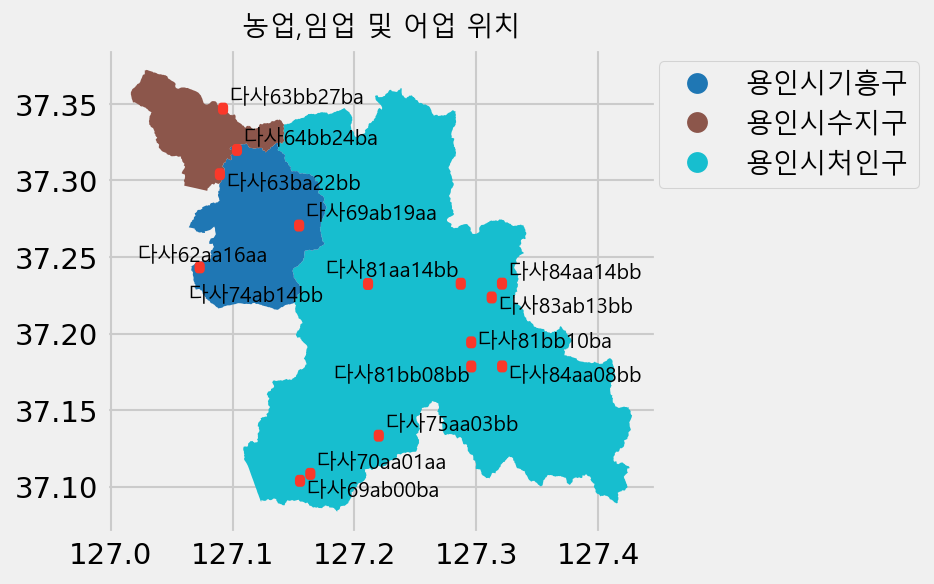

In [20]:
# https://stackoverflow.com/questions/19073683/matplotlib-overlapping-annotations-text

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.set_aspect('equal')

m.plot(ax=ax,column='SIG_KOR_NM',legend=True,
        legend_kwds={'bbox_to_anchor':(1.5,1),'prop':fontprop})
geo.loc[df_a.gid.values]['geometry'].buffer(1/360).plot(color='#fa382a',ax=ax)

ax.set_title("농업,임업 및 어업 위치",fontproperties=fontprop)

texts=[]
for text,lng,lat in zip(geo.loc[df_a.gid.values]['geometry'].index,geo.loc[df_a.gid.values]['geometry'].bounds['maxx'],geo.loc[df_a.gid.values]['geometry'].bounds['maxy']):
    texts.append(plt.text(x=lng,y=lat,s=text,fontdict={'size':10,'fontproperties':fontprop}))
    
adjust_text(texts, only_move={'points':'x', 'texts':'x','texts':'y'})
plt.show()

In [21]:
# 주소 빼기
arr=[]
for area in geo.loc[df_a.gid.values]['geometry']:
    n=len(arr)
    for gu in m.geometry:
        if gu.contains(area):
            arr.append(m.loc[m['geometry']==gu,'SIG_KOR_NM'])
        l=len(arr)
    if l==n:
        arr.append(area)

# 일부 직접 고치기
arr[2]='용인시수지구'
arr[3]='용인시기흥구'

# value 값 얻기
for a in range(15):
    if type(arr[a])!=str:
        arr[a]=arr[a].item()
    
# 전처리
df_a['구']=arr

In [22]:
yg=df_a[df_a['구']=='용인시기흥구']
ys=df_a[df_a['구']=='용인시수지구']
yc=df_a[df_a['구']=='용인시처인구']

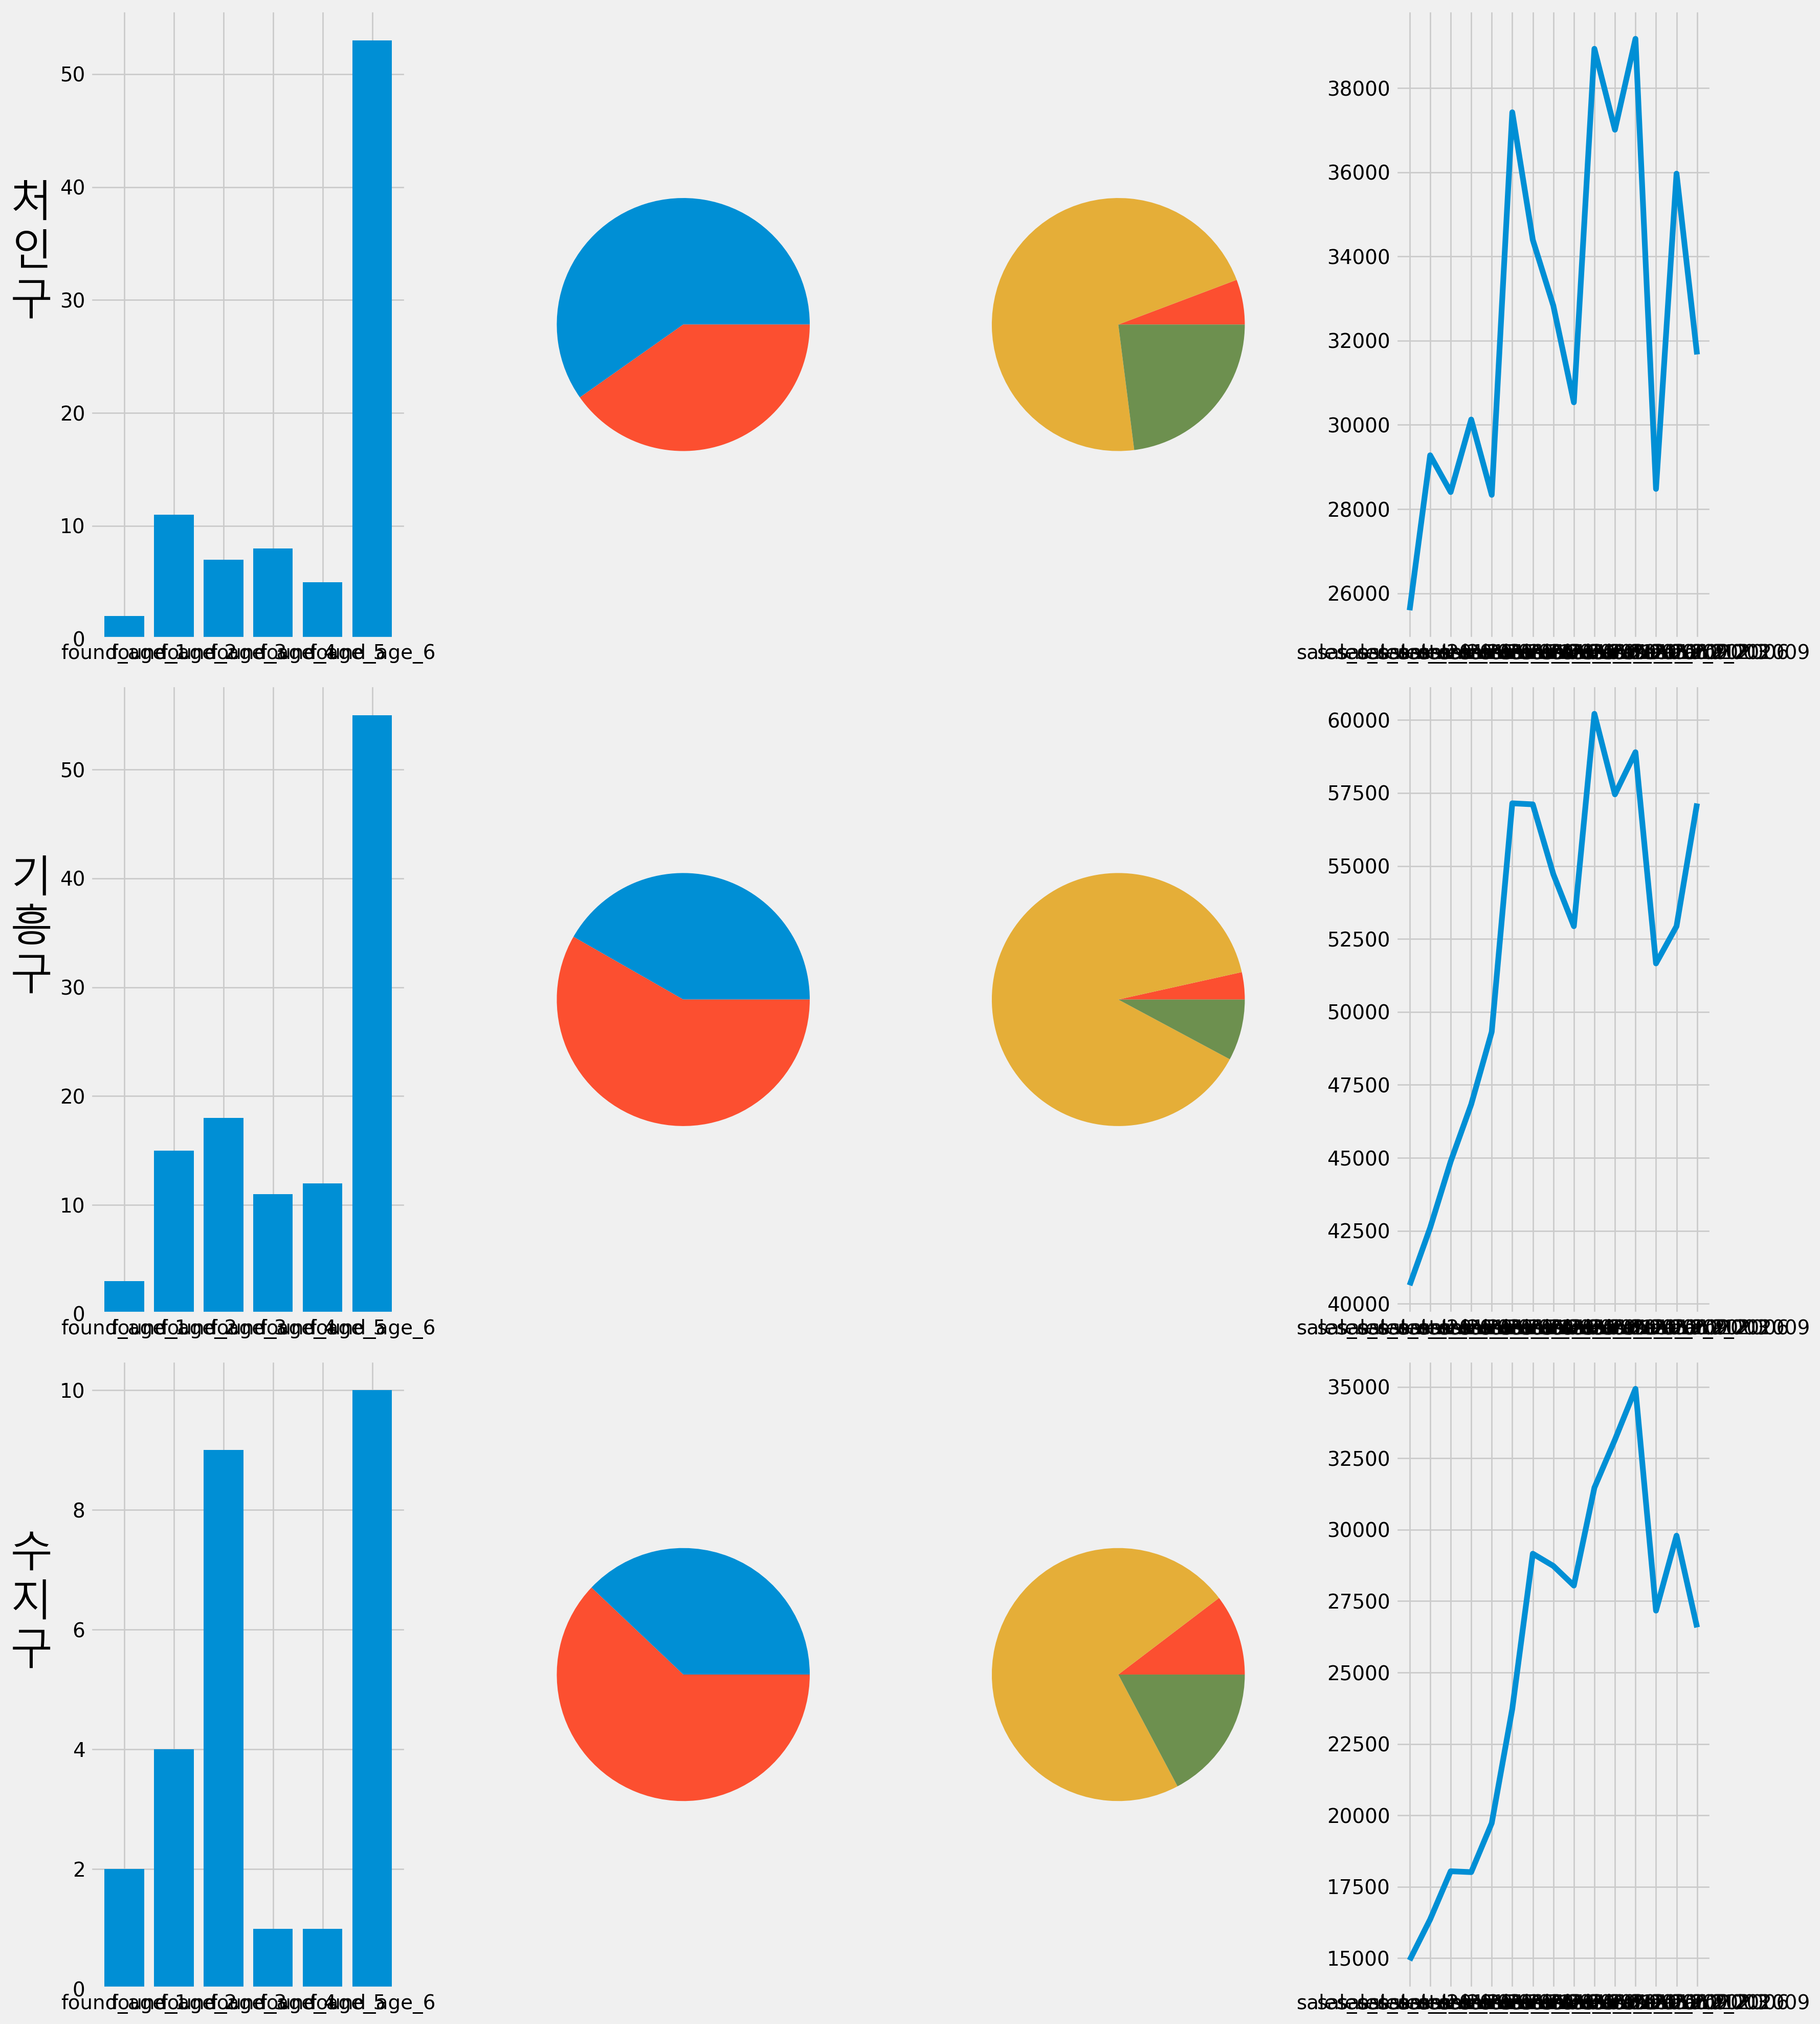

In [23]:
# yc 처인 yg 기흥 ys 수지
yc=yc.sum(axis=0)
yg=yg.sum(axis=0)
ys=ys.sum(axis=0)

# 사업체 진행년도 bar chart
yc_agriculture_year=yc[2:8]
yg_agriculture_year=yg[2:8]
ys_agriculture_year=ys[2:8]

# 대표자 성별 pie chart
yc_agriculture_representative=yc[10:12]
yg_agriculture_representative=yg[10:12]
ys_agriculture_representative=ys[10:12]

# 대표 나이 비교 pie chart 
yc_agriculture_representative_age=yc[12:16]
yg_agriculture_representative_age=yg[12:16]
ys_agriculture_representative_age=ys[12:16]

# 매출 bar-line chart
yc_agriculture_revenue=yc[23:38]
yg_agriculture_revenue=yg[23:38]
ys_agriculture_revenue=ys[23:38]
# x = yc[23:38]
# y = range(0,15)
# plt.plot(y,x,color = 'green')


fig,ax=plt.subplots(3,4,figsize=(18,20),dpi=200)

# 처인구
ax[0][0].bar(yc_agriculture_year.index,yc_agriculture_year)
ax[0][0].set_ylabel("처   \n인   \n구   ",fontproperties=fontprop,rotation=0,fontsize=30)
ax[0][1].pie(yc_agriculture_representative)
ax[0][2].pie(yc_agriculture_representative_age)
ax[0][3].plot(yc_agriculture_revenue)
# 기흥구
ax[1][0].bar(yg_agriculture_year.index,yg_agriculture_year)
ax[1][0].set_ylabel("기   \n흥   \n구   ",fontproperties=fontprop,rotation=0,fontsize=30)
ax[1][1].pie(yg_agriculture_representative)
ax[1][2].pie(yg_agriculture_representative_age)
ax[1][3].plot(yg_agriculture_revenue)
# 수지구
ax[2][0].bar(ys_agriculture_year.index,ys_agriculture_year)
ax[2][0].set_ylabel("수   \n지   \n구   ",fontproperties=fontprop,rotation=0,fontsize=30)
ax[2][1].pie(ys_agriculture_representative)
ax[2][2].pie(ys_agriculture_representative_age)
ax[2][3].plot(ys_agriculture_revenue)
    
    
plt.tight_layout()
plt.show()

### <a id="goback">시작</a>

1. 처인구의 기업이 들어오면서 개발지역으로 되고 있다.  -  4번과 연결. 그럼에도 농업을 미래 유망직종으로 키울 필요가 있다.  

2. 용인은 도농복합도시다. - 이미지가 많이 떨어졌지만 여전하다. 부지, 교통이 가장 큰 특징이다. 

3. 농촌이 망가지고 있다. - sk하이닉스 오.폐수 처리 및 물류단지 우회도로 건설. 등.

4. 1인가구가 많아지면서 소비자는 많아지는데 농업종사자는 줄어들고 있다. - 수지타산 
[link](http://www.yongin21.co.kr/news/articleView.html?idxno=65546)

5. 청년들이 농업관련해서 정착할 수 있게 도움을 준다. - 결정적으로 교통. 
[link](http://www.newschange.co.kr/2797)

In [24]:
# m.set_index('SIG_KOR_NM').geometry.bounds

yc=pop.loc[(37.083636<=pop['lat'])&(pop['lat']<=37.360442)&(127.108728<=pop['lon'])&(pop['lon']<=127.427754)]
yg=pop.loc[(37.215533<=pop['lat'])&(pop['lat']<=37.324722)&(127.064024<=pop['lon'])&(pop['lon']<=127.177128)]
ys=pop.loc[(37.293231<=pop['lat'])&(pop['lat']<=37.372320)&(127.016486<=pop['lon'])&(pop['lon']<=127.142444)]

In [25]:
m2=gpd.read_file('12.용인시_법정경계(읍면동).geojson')

In [26]:
m2['구']=['처인구']*17+['기흥구']*18+['수지구']*7

In [27]:
# address=[]
# for x,y in tqdm(pop[['lon','lat']].values):
#     l=len(address)
#     for i in range(42):
#         if Point(x,y).within(m2['geometry'].iloc[i]):
#             address.append('경기도 용인시 '+m2.iloc[i]['구']+' '+m2.iloc[i]['EMD_KOR_NM'])
#             break
#     m=len(address)
#     if l==m:
#         address.append('null')

In [28]:
# display(pop.index.nunique())
# display(len(address))

# pop['주소']=address

In [29]:
# pop.to_csv('population.csv',index=False)

In [30]:
pop=pd.read_csv('population.csv')

In [31]:
yc_1901=yc[yc['STD_YM']==201901]
yc_1902=yc[yc['STD_YM']==201902]
yc_1903=yc[yc['STD_YM']==201903]
yc_1904=yc[yc['STD_YM']==201904]
yc_1905=yc[yc['STD_YM']==201905]
yc_1906=yc[yc['STD_YM']==201906]

In [32]:
# 읍,면,동 지도
# fig,ax=plt.subplots(1,1,figsize=(7,10),dpi=150)

# m2.plot(ax=ax,column='EMD_KOR_NM',legend=True,cmap='Set2',
#         legend_kwds={'bbox_to_anchor':(1.15,-0.1),'prop':fontprop,'ncol':5})

# ax.set_title("")

# plt.show()